<div style="background-color: #d4edda; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<strong>GROUP NUMBER - 10</strong>

In [1]:
from tabulate import tabulate

# Example data
data = [
    ["Atul Wadhwa", "0296432", "Yes", "yes", " "],
    ["Bijula Rosy", "0285028", "yes", "yes", "yes"],
    ["Meera Kurian", "0269552", "yes", "yes", "yes"],
    ["Ridhi Sharma", "0285421", "Yes", "yes", " "]
]

# Headers for the table
headers = ["Name", "Student ID", "Discussion", "Designing", "Python Coding"]

bold_header = '\033[1m'

# Make headers bold
bold_headers = [bold_header + header + '\033[0m' for header in headers]

# Generate and print the table
print(tabulate(data, headers=bold_headers, tablefmt="grid"))

+--------------+--------------+--------------+-------------+-----------------+
| Name         |   Student ID | Discussion   | Designing   | Python Coding   |
+==============+==============+==============+=============+=================+
| Atul Wadhwa  |      0296432 | Yes          | yes         |                 |
+--------------+--------------+--------------+-------------+-----------------+
| Bijula Rosy  |      0285028 | yes          | yes         | yes             |
+--------------+--------------+--------------+-------------+-----------------+
| Meera Kurian |      0269552 | yes          | yes         | yes             |
+--------------+--------------+--------------+-------------+-----------------+
| Ridhi Sharma |      0285421 | Yes          | yes         |                 |
+--------------+--------------+--------------+-------------+-----------------+


##### Dataset name and URL

Country comparison dataset USA
https://www.kaggle.com/datasets/waqi786/country-comparison-dataset-usa-and-more

<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-size: 24px;">
<strong>1. BUSINESS UNDERSTANDING</strong>
</div>

<div style="background-color: #d4edda; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<strong>STEPS</strong>
<ul>
    <li>Document the title, objective and Research questions</li>
</div>

### 1.1 TITLE

Countrywise GDP Prediction and an EDA on the three fundamental pillars of Sustainability Development.

### 1.2 OBJECTIVE

This study project aims to examine the GDP patterns of six nations (USA, Canada, Australia, Russia, China, and India) from 2000 to 2023 and to forecast future GDP growth based on critical economic, social, and environmental variables of sustainable development. To determine significant trends and correlations between these pillars and GDP which will aid in generating insights into sustainable development and policy formulation.

### 1.3 RESEARCH QUESTION

1. What are the historical trends in GDP growth for the USA, Canada, Australia, Russia, China, and India from 2000 to 2023?
2. What are the key economic, social, and environmental variables that correlate strongly with GDP growth in these six nations?
4. GDP prediction of countries?

<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-size: 24px;">
<strong>2. DATA UNDERSTANDING</strong>
</div>

<div style="background-color: #d4edda; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<strong>STEPS</strong>
<ul>
    <li>Importing Libraries and the data</li>
    <li>Details of rows, columns, Tagret Variable, Independent variables, distribution of sustainability development attributes, Value counts, unique values, data types  </li>
    <li>Data Expoloratory analysis such as visualization, statistics, correlation, skewness and Kurtosis</li>
</div>

### 2.1 DATA COLLECTION

#### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels as sm
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
from scipy.stats import shapiro, skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from matplotlib_venn import venn3
from scipy.stats import zscore
from scipy.stats import shapiro
from sklearn.preprocessing import PowerTransformer

#### Import Dataset

In [3]:
country = pd.read_csv("D:/PB BUSINESS ANALYTICS/THIRD SEMESTER/PREDECTIVE MODELING/Project/Countrylist.csv")
country.head(2)

,Country,Year,GDP (in Trillions USD),GDP per Capita (in USD),Inflation Rate (%),Military Expenditure (in Billion USD),Number of Active Military Personnel,Number of Airports,Road Network Length (in km),Public Transport Usage (%),...,Human Development Index (HDI),Gender Equality Index,"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%),Energy Consumption (TWh),Renewable Energy Share (%),CO2 Emissions (Million Metric Tons),Forest Coverage ()
0,Australia,2000,0.42,21000,1.54,12,56376.0,575,867390,16.59,...,0.92,1.00,855.0,76.15,24.68,89.15,200,8.0,400,16.3
1,Canada,2000,0.74,"24,000",1.96,10,67972.5,502,985000,17.51,...,0.96,0.94,795.2,74.74,16.42,63.00,550,57.0,600,38.2


### 2.2 DATA SHAPE

#### Rows and Columns

In [4]:
num_rows, num_columns = country.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 144
Number of columns: 36


#### Key Columns

In [5]:
country.columns

Index(['Country', 'Year', 'GDP (in Trillions USD)', 'GDP per Capita (in USD)',
       'Inflation Rate (%)', 'Military Expenditure (in Billion USD)',
       'Number of Active Military Personnel', 'Number of Airports',
       'Road Network Length (in km)', 'Public Transport Usage (%)',
       'Poverty Rate (%)', 'Number of International Visitors (in Millions)',
       'Tourism Revenue (in Billion USD)', 'Agricultural Land (%)',
       'Unemployment Rate (%)', 'Labor Force Participation Rate (%)',
       'Population (in Millions)', 'Population Growth Rate (%)',
       'Urban Population (%)', 'Life Expectancy (Years)',
       'Healthcare Expenditure per Capita (USD)', 'Doctor-to-Patient Ratio',
       'Literacy Rate (%)', 'Education Expenditure as % of GDP',
       'Internet Penetration (%)', 'Smartphone Adoption (%)',
       'Human Development Index (HDI)', 'Gender Equality Index',
       'Crime Rate (per 100,000)', 'Corruption Perception Index',
       'Freedom of Press Index', 'Voting P

#### Value Counts

In [6]:
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Country                                         144 non-null    object 
 1   Year                                            144 non-null    int64  
 2   GDP (in Trillions USD)                          144 non-null    float64
 3   GDP per Capita (in USD)                         144 non-null    object 
 4   Inflation Rate (%)                              144 non-null    float64
 5   Military Expenditure (in Billion USD)           144 non-null    int64  
 6   Number of Active Military Personnel             144 non-null    float64
 7   Number of Airports                              144 non-null    int64  
 8   Road Network Length (in km)                     144 non-null    int64  
 9   Public Transport Usage (%)                 

In [7]:
print("Number of unique countries: ", len(country["Country"].unique()))
country["Country"].unique()

Number of unique countries:  6


array(['Australia', 'Canada', 'China', 'India', 'Russia', 'USA'],
      dtype=object)

In [8]:
print("Number of years data collected: ", len(country["Year"].unique()))
country["Year"].unique()

Number of years data collected:  24


array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

### 2.3 DATA TYPES

In [9]:
country.dtypes

Country                                            object
Year                                                int64
GDP (in Trillions USD)                            float64
GDP per Capita (in USD)                            object
Inflation Rate (%)                                float64
Military Expenditure (in Billion USD)               int64
Number of Active Military Personnel               float64
Number of Airports                                  int64
Road Network Length (in km)                         int64
Public Transport Usage (%)                        float64
Poverty Rate (%)                                  float64
Number of International Visitors (in Millions)    float64
Tourism Revenue (in Billion USD)                  float64
Agricultural Land (%)                             float64
Unemployment Rate (%)                             float64
Labor Force Participation Rate (%)                float64
Population (in Millions)                          float64
Population Gro

In [10]:
print("Number of categorical columns:",len(country.select_dtypes(include = ['object']).columns))
print ("\nCategorical Columns:",country.select_dtypes(include = ['object']).columns)
print("\nNumber of Numerical columns:",len(country.select_dtypes(include = ['float','int']).columns))
print ("\nNumerical Columns:",country.select_dtypes(include = ['float','int']).columns)

Number of categorical columns: 4

Categorical Columns: Index(['Country', 'GDP per Capita (in USD)', 'Energy Consumption (TWh)',
       'CO2 Emissions (Million Metric Tons)'],
      dtype='object')

Number of Numerical columns: 32

Numerical Columns: Index(['Year', 'GDP (in Trillions USD)', 'Inflation Rate (%)',
       'Military Expenditure (in Billion USD)',
       'Number of Active Military Personnel', 'Number of Airports',
       'Road Network Length (in km)', 'Public Transport Usage (%)',
       'Poverty Rate (%)', 'Number of International Visitors (in Millions)',
       'Tourism Revenue (in Billion USD)', 'Agricultural Land (%)',
       'Unemployment Rate (%)', 'Labor Force Participation Rate (%)',
       'Population (in Millions)', 'Population Growth Rate (%)',
       'Urban Population (%)', 'Life Expectancy (Years)',
       'Healthcare Expenditure per Capita (USD)', 'Doctor-to-Patient Ratio',
       'Literacy Rate (%)', 'Education Expenditure as % of GDP',
       'Internet Penetr

### 2.4 DATA DICTIONARY

#### Target Variable and Independent Variables

In [11]:
dependent_variable = "GDP (in Trillions USD)"
independent_variables = country.columns[country.columns != dependent_variable]
num_dependent_columns = 1
num_independent_columns = len(independent_variables)
print(f"Number of Dependent Column/Target/Response Variable: {num_dependent_columns}")
print(f"Number of independent columns: {num_independent_columns}")
print("\nDependent variable/Target/Response Variable:", dependent_variable)
print("Independent variables:", independent_variables)

Number of Dependent Column/Target/Response Variable: 1
Number of independent columns: 35

Dependent variable/Target/Response Variable: GDP (in Trillions USD)
Independent variables: Index(['Country', 'Year', 'GDP per Capita (in USD)', 'Inflation Rate (%)',
       'Military Expenditure (in Billion USD)',
       'Number of Active Military Personnel', 'Number of Airports',
       'Road Network Length (in km)', 'Public Transport Usage (%)',
       'Poverty Rate (%)', 'Number of International Visitors (in Millions)',
       'Tourism Revenue (in Billion USD)', 'Agricultural Land (%)',
       'Unemployment Rate (%)', 'Labor Force Participation Rate (%)',
       'Population (in Millions)', 'Population Growth Rate (%)',
       'Urban Population (%)', 'Life Expectancy (Years)',
       'Healthcare Expenditure per Capita (USD)', 'Doctor-to-Patient Ratio',
       'Literacy Rate (%)', 'Education Expenditure as % of GDP',
       'Internet Penetration (%)', 'Smartphone Adoption (%)',
       'Human Deve

#### Variables and Attributes

#### Economic Pillars

In [12]:
Economic_pillars = country.iloc[:,2:14]
print("\nNumber of columns that represent Economic Pillars:", len(Economic_pillars.columns))
print("\nColumns that represent Economic Pillars:", Economic_pillars.columns)


Number of columns that represent Economic Pillars: 12

Columns that represent Economic Pillars: Index(['GDP (in Trillions USD)', 'GDP per Capita (in USD)',
       'Inflation Rate (%)', 'Military Expenditure (in Billion USD)',
       'Number of Active Military Personnel', 'Number of Airports',
       'Road Network Length (in km)', 'Public Transport Usage (%)',
       'Poverty Rate (%)', 'Number of International Visitors (in Millions)',
       'Tourism Revenue (in Billion USD)', 'Agricultural Land (%)'],
      dtype='object')


#### SocialPillars

In [13]:
Social_pillars = country.iloc[:,14:32]
print("\nNumber of columns that represent Social Pillars:", len(Social_pillars.columns))
print("\nColumns that represent Social Pillars:", Social_pillars.columns)


Number of columns that represent Social Pillars: 18

Columns that represent Social Pillars: Index(['Unemployment Rate (%)', 'Labor Force Participation Rate (%)',
       'Population (in Millions)', 'Population Growth Rate (%)',
       'Urban Population (%)', 'Life Expectancy (Years)',
       'Healthcare Expenditure per Capita (USD)', 'Doctor-to-Patient Ratio',
       'Literacy Rate (%)', 'Education Expenditure as % of GDP',
       'Internet Penetration (%)', 'Smartphone Adoption (%)',
       'Human Development Index (HDI)', 'Gender Equality Index',
       'Crime Rate (per 100,000)', 'Corruption Perception Index',
       'Freedom of Press Index', 'Voting Participation Rate (%)'],
      dtype='object')


#### Environmental Pillars

In [14]:
Environment_pillars = country.iloc[:,32:36]
print("\nNumber of columns that represent Environment Pillars:", len(Environment_pillars.columns))
print("\nColumns that represent Environment Pillars:", Environment_pillars.columns)


Number of columns that represent Environment Pillars: 4

Columns that represent Environment Pillars: Index(['Energy Consumption (TWh)', 'Renewable Energy Share (%)',
       'CO2 Emissions (Million Metric Tons)', 'Forest Coverage ()'],
      dtype='object')


<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Number of rows: 144</li>
    <li>Number of columns: 36</li>
    <li>Records: six nations (Developed nations USA, Canada, Australia and developing nations such as Russia, China, and India)</li>
    <li>Year period: 2000 to 2023</li>
    <li>Numerical Columns: 32, Categorical Columns: 4</li>
    <li>Convertable columns: GDP per Capita(in USD),Energy Consumption(TWh),CO2 Emissions(Million Metric Tons)) are object and required conversion.</li>
    <li>Economic Pillars: 12, Social Pillars: 18, Environmental pillars: 4</li>
    <li>Target Variable:'GDP (in Trillions USD)', Independent Pillars: 35</li>
</ul>
</div>

### 2.5 DATA EXPLORATORY ANALYSIS

#### Visualization

##### Data distributions of variables

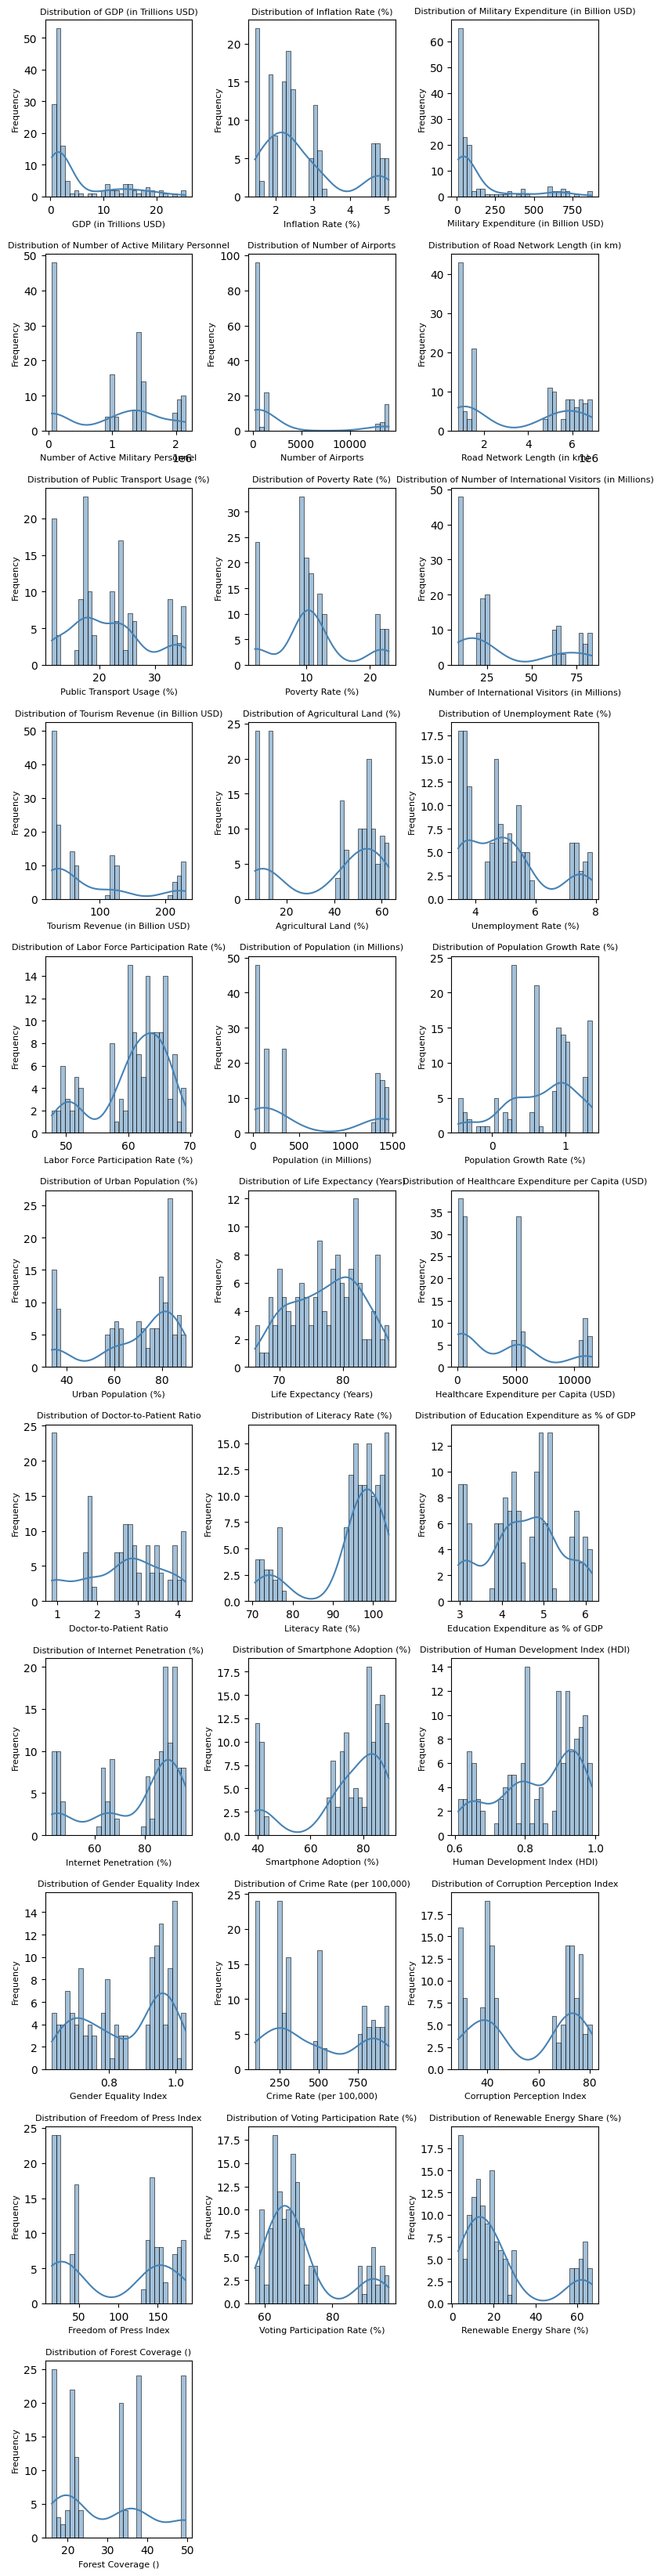

In [15]:
numerical_columns = country.select_dtypes(include=['float64', 'int64']).columns
numerical_columns = [col for col in numerical_columns if col.lower() != 'year']

num_vars = len(numerical_columns)
cols = 3  
rows = math.ceil(num_vars / cols) 

fig, axes = plt.subplots(rows, cols, figsize=(8, 3 * rows))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(country[col], kde=True, color="steelblue", bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}",fontsize=8)
    axes[i].set_xlabel(col,fontsize=8)
    axes[i].set_ylabel("Frequency",fontsize=8)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Out of the 35 independant variable we can see Poverty rate,education expenditure and life expectancy which are close to normal distribution.</li>
</ul>
</div>

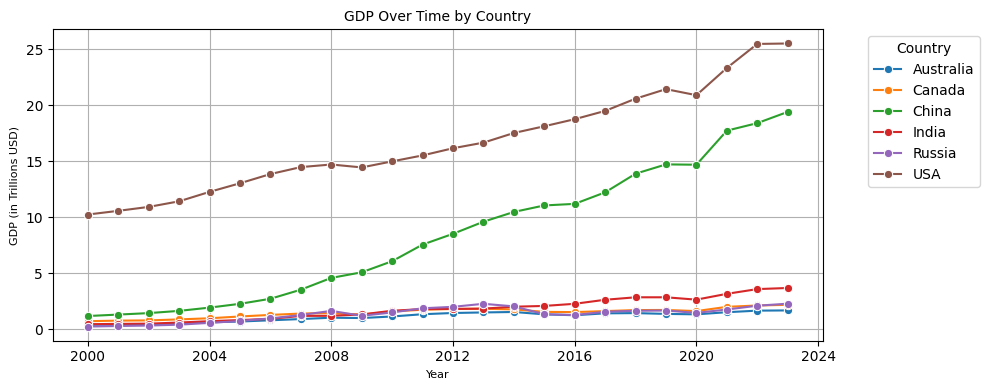

In [16]:
country['Year'] = pd.to_datetime(country['Year'], format='%Y')

# GDP Trends Over Time
plt.figure(figsize=(10, 4))
sns.lineplot(data=country, x='Year', y='GDP (in Trillions USD)', hue='Country', marker='o')  # Corrected argument name
plt.title('GDP Over Time by Country', fontsize=10)
plt.xlabel('Year', fontsize=8)
plt.ylabel('GDP (in Trillions USD)', fontsize=8)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>USA consistently has the highest GDP exceeding USD 25 trillion by 2024.</li>
    <li>China shows the fastest growth, surpassing USD 15 trillion</li>
    <li>India’s GDP steadily rises, emerging as a notable economy though still below China and the USA</li>
    <li>Australia, Canada, and Russia exhibit more moderate and similar growth trends</li>
</ul>
</div>

#### Statistics

In [17]:
country.describe()

,Year,GDP (in Trillions USD),Inflation Rate (%),Military Expenditure (in Billion USD),Number of Active Military Personnel,Number of Airports,Road Network Length (in km),Public Transport Usage (%),Poverty Rate (%),Number of International Visitors (in Millions),...,Internet Penetration (%),Smartphone Adoption (%),Human Development Index (HDI),Gender Equality Index,"Crime Rate (per 100,000)",Corruption Perception Index,Freedom of Press Index,Voting Participation Rate (%),Renewable Energy Share (%),Forest Coverage ()
count,144,144.000000,144.000000,144.000000,1.440000e+02,144.000000,1.440000e+02,144.000000,144.000000,144.000000,...,144.000000,144.000000,144.000000,144.000000,144.00000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,2011-07-02 18:00:00,5.149792,2.653125,143.819444,1.007334e+06,2724.604167,3.482255e+06,21.482292,10.975139,35.271806,...,77.719028,73.603403,0.837708,0.848681,474.94375,55.235347,92.348403,70.296736,22.212500,29.893750
min,2000-01-01 00:00:00,0.260000,1.440000,10.000000,5.515800e+04,229.000000,8.334600e+05,11.440000,1.910000,8.970000,...,42.880000,38.950000,0.610000,0.630000,95.30000,28.560000,15.280000,57.240000,2.900000,16.000000
25%,2005-10-01 18:00:00,1.285000,1.887500,25.000000,6.807375e+04,247.750000,1.009750e+06,17.162500,9.317500,10.960000,...,65.547500,69.685000,0.757500,0.720000,250.43750,40.070000,25.137500,63.420000,9.650000,20.650000
50%,2011-07-02 12:00:00,1.735000,2.330000,52.000000,1.194900e+06,548.500000,3.165000e+06,20.345000,10.040000,23.370000,...,86.600000,79.500000,0.870000,0.880000,395.35000,54.820000,90.220000,67.615000,16.000000,28.350000
75%,2017-04-02 06:00:00,7.810000,3.072500,93.750000,1.464262e+06,1211.750000,5.929500e+06,25.245000,12.360000,64.625000,...,90.877500,84.975000,0.930000,0.960000,796.40000,73.410000,150.337500,71.192500,24.225000,38.200000
max,2023-01-01 00:00:00,25.500000,5.040000,877.000000,2.150450e+06,14003.000000,6.890400e+06,35.500000,22.970000,83.600000,...,96.250000,89.700000,0.990000,1.030000,943.20000,80.850000,185.320000,96.600000,67.200000,49.500000
std,NaN,6.522467,1.067940,215.813525,7.408706e+05,4875.520006,2.418054e+06,7.015008,5.885337,27.234486,...,17.456599,15.966449,0.112609,0.127006,292.35926,18.662935,65.630659,10.602064,19.181211,11.699293


#### Correlation

##### Correlation Matric of Numerical variables based on the three pillars of Sustainable Development

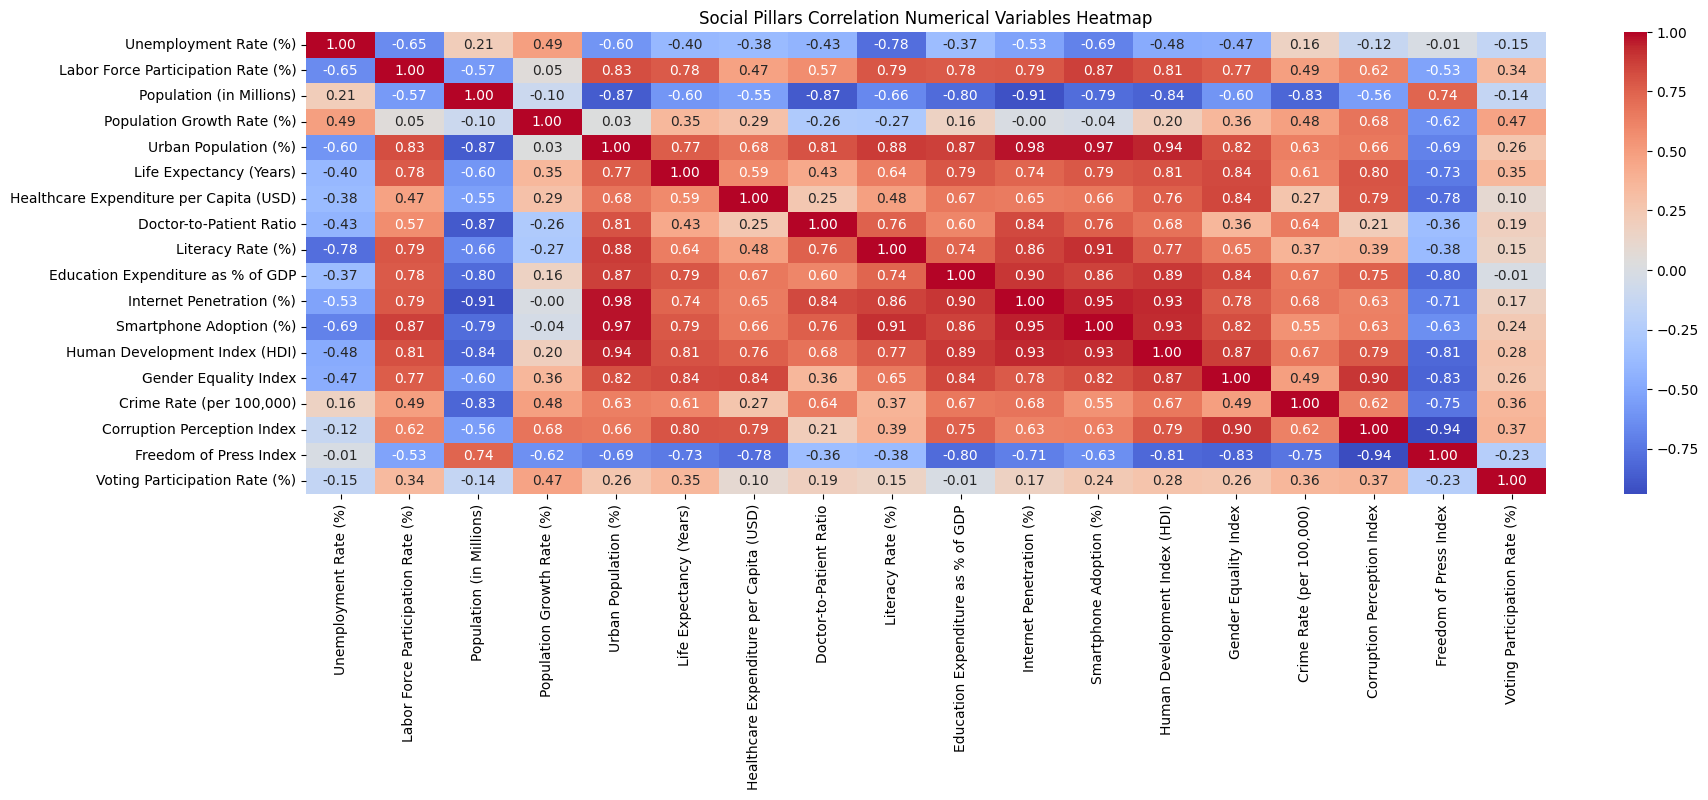

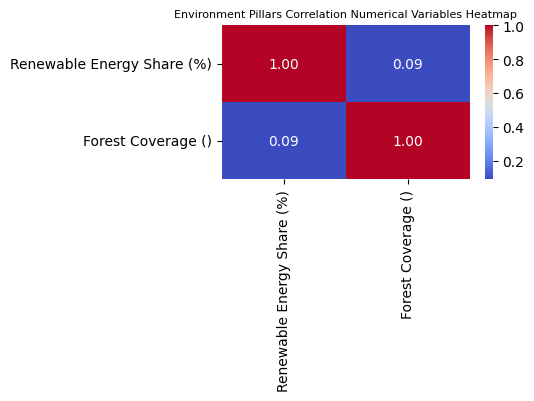

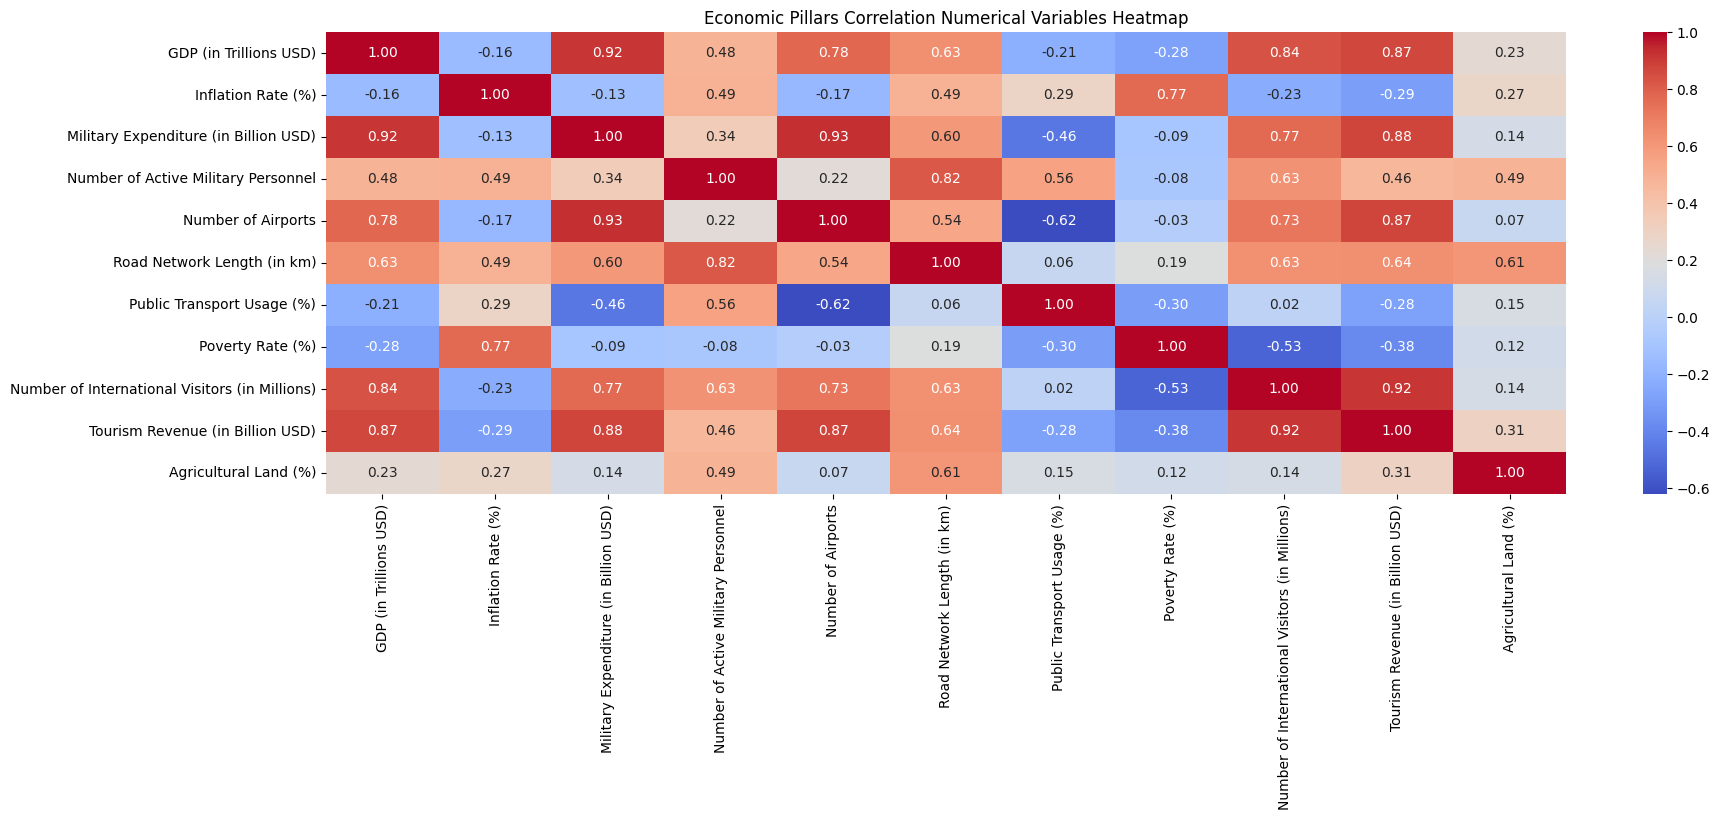

In [18]:
numeric_soci = Social_pillars.select_dtypes(include=['float64', 'int64']).columns
social_matrix = Social_pillars[numeric_soci].corr()
plt.figure(figsize=(20, 6))
sns.heatmap(social_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Social Pillars Correlation Numerical Variables Heatmap")
plt.show()

numeric_envi = Environment_pillars.select_dtypes(include=['float64', 'int64']).columns
Environment_matrix = Environment_pillars[numeric_envi].corr()
plt.figure(figsize=(4, 2))
sns.heatmap(Environment_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Environment Pillars Correlation Numerical Variables Heatmap", fontsize=8)
plt.show()

numeric_eco = Economic_pillars.select_dtypes(include=['float64', 'int64']).columns
economic_matrix = Economic_pillars[numeric_eco].corr()
plt.figure(figsize=(20, 6))
sns.heatmap(economic_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Economic Pillars Correlation Numerical Variables Heatmap")
plt.show()

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
<li><strong>Social Pillars Correlation:</strong></li>
<ul>
<li>Positive correlation</li>
<ul>
<li>Internet penetration correlates strongly with literacy rate and HDI</li>
<li>Higher internet access aligns with improvements in education and quality of life.</li>
<li>Life expectancy correlates positively with healthcare expenditure per capita, emphasizing the role of investment in health services.</li>
</ul>
</ul>
<ul>
<li>Negative Correlation</li>
<ul>
<li>Poverty rate is negatively correlated with HDI, education expenditure, and literacy rate, suggesting that socio-economic improvements reduce poverty</li>
<li>Crime rate shows a weak or mixed correlation with other variables, indicating its multifactorial nature</li>
</ul>
</ul>
<li><strong>Environmental Pillars Correlation</strong></li>
<ul>
<li>Positive correlation</li>
<ul>
<li>Renewable Energy Share slightly correlated with Forest Coverage, indicating that countries with higher renewable energy adoption may also maintain forest conservation to some extent.</li>
</ul>
</ul>
<ul>
<li>Negative Correlation</li>
<ul>
<li>There are no notable strong negative correlations in the environmental pillar, as Renewable Energy Share and Forest Coverage exhibit minimal interdependence.</li>
</ul>
</ul>
<li><strong>Economic Pillars Correlation</strong></li>
<ul>
<li>Positive correlation</li>
<ul>
<li>GDP positively correlated with tourism revenue, infrastructure development (road networks, airports), and HDI, indicating that economic growth is tied to both infrastructure investments and overall human development.</li>
<li>Tourism Revenue: Strongly linked with the number of international visitors and infrastructure like airports, suggesting that better infrastructure supports economic gains from tourism</li>
</ul>
</ul>
<ul>
<li>Negative Correlation</li>
<ul>
<li>Inflation Rate shows weak to moderate negative correlations with certain economic indicators like GDP, reflecting its potential to dampen economic stability and growth.</li>
</ul>
</ul>
</ul>
</div>

#### Skewness

In [19]:
Numerical_country = country.select_dtypes(include=['float64', 'int64'])
Numerical_country.skew(axis = 0, skipna = True, numeric_only=True)

GDP (in Trillions USD)                            1.507333
Inflation Rate (%)                                1.066026
Military Expenditure (in Billion USD)             1.983432
Number of Active Military Personnel              -0.137452
Number of Airports                                1.794198
Road Network Length (in km)                       0.090390
Public Transport Usage (%)                        0.481513
Poverty Rate (%)                                  0.485808
Number of International Visitors (in Millions)    0.680561
Tourism Revenue (in Billion USD)                  1.148933
Agricultural Land (%)                            -0.562761
Unemployment Rate (%)                             0.806063
Labor Force Participation Rate (%)               -0.954936
Population (in Millions)                          0.635272
Population Growth Rate (%)                       -0.547472
Urban Population (%)                             -1.030289
Life Expectancy (Years)                          -0.1674

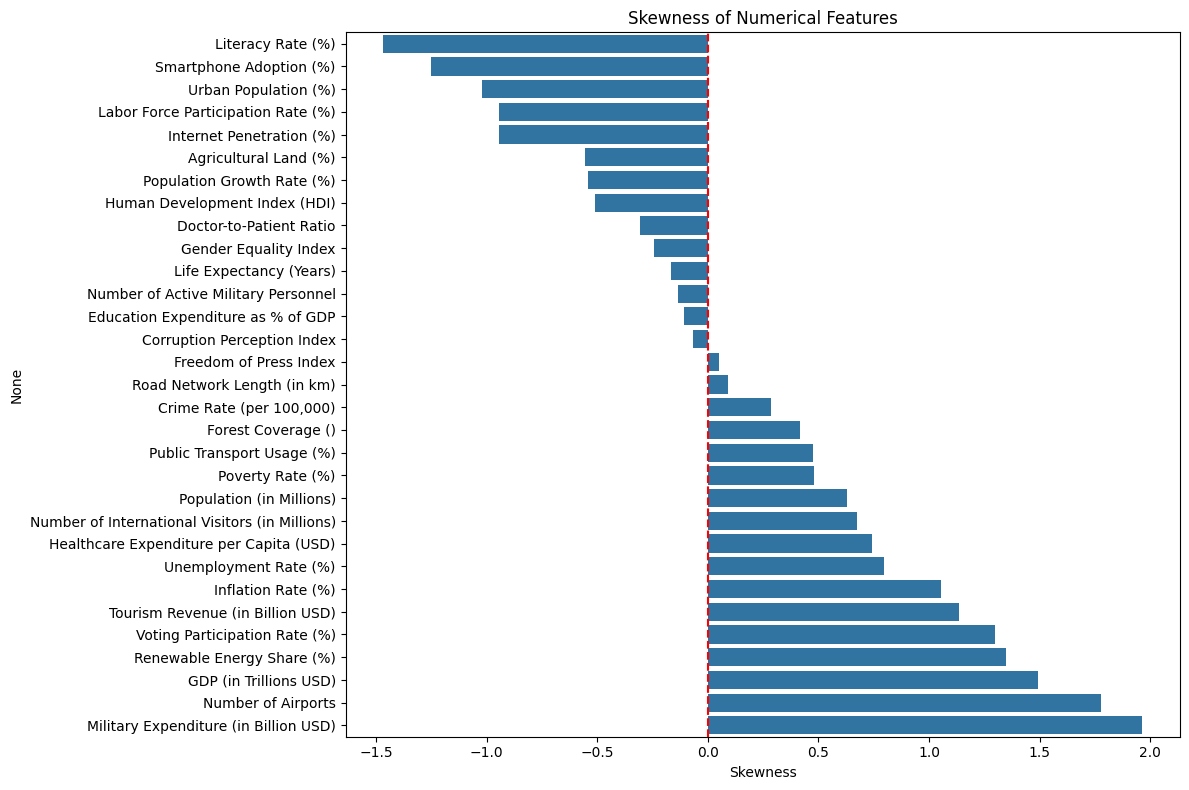

In [20]:
numerical_columns = country.select_dtypes(include=['float64', 'int64']).columns
skewness_values = country[numerical_columns].apply(skew)
skewness_values_sorted = skewness_values.sort_values()

plt.figure(figsize=(12, 8))
sns.barplot(x=skewness_values_sorted.values, y=skewness_values_sorted.index, orient='h')
plt.title('Skewness of Numerical Features')
plt.xlabel('Skewness')
plt.axvline(x=0, color='r', linestyle='--')
plt.tight_layout()

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Military expenditure, GDP, and renewable energy share are positively skewed indicating that a few countries dominate these areas while most have lower values.</li>
    <li>negatively skewed features like literacy rate, smartphone adoption, and urban population suggest widespread global progress, with only a few lagging.</li>
    <li>Symmetrical features like the Freedom of Press Index are evenly distributed across countries, reflecting balanced variation.</li>
</ul>
</div>

#### Kurtosis

In [21]:
kurtosis = country.select_dtypes(include=[np.number]).kurt()
print(kurtosis)

GDP (in Trillions USD)                            1.000560
Inflation Rate (%)                               -0.001125
Military Expenditure (in Billion USD)             2.677629
Number of Active Military Personnel              -1.352274
Number of Airports                                1.274017
Road Network Length (in km)                      -1.858198
Public Transport Usage (%)                       -0.635987
Poverty Rate (%)                                 -0.024071
Number of International Visitors (in Millions)   -1.252816
Tourism Revenue (in Billion USD)                 -0.159274
Agricultural Land (%)                            -1.462777
Unemployment Rate (%)                            -0.359758
Labor Force Participation Rate (%)               -0.036492
Population (in Millions)                         -1.505933
Population Growth Rate (%)                       -0.431549
Urban Population (%)                             -0.287121
Life Expectancy (Years)                          -0.9806

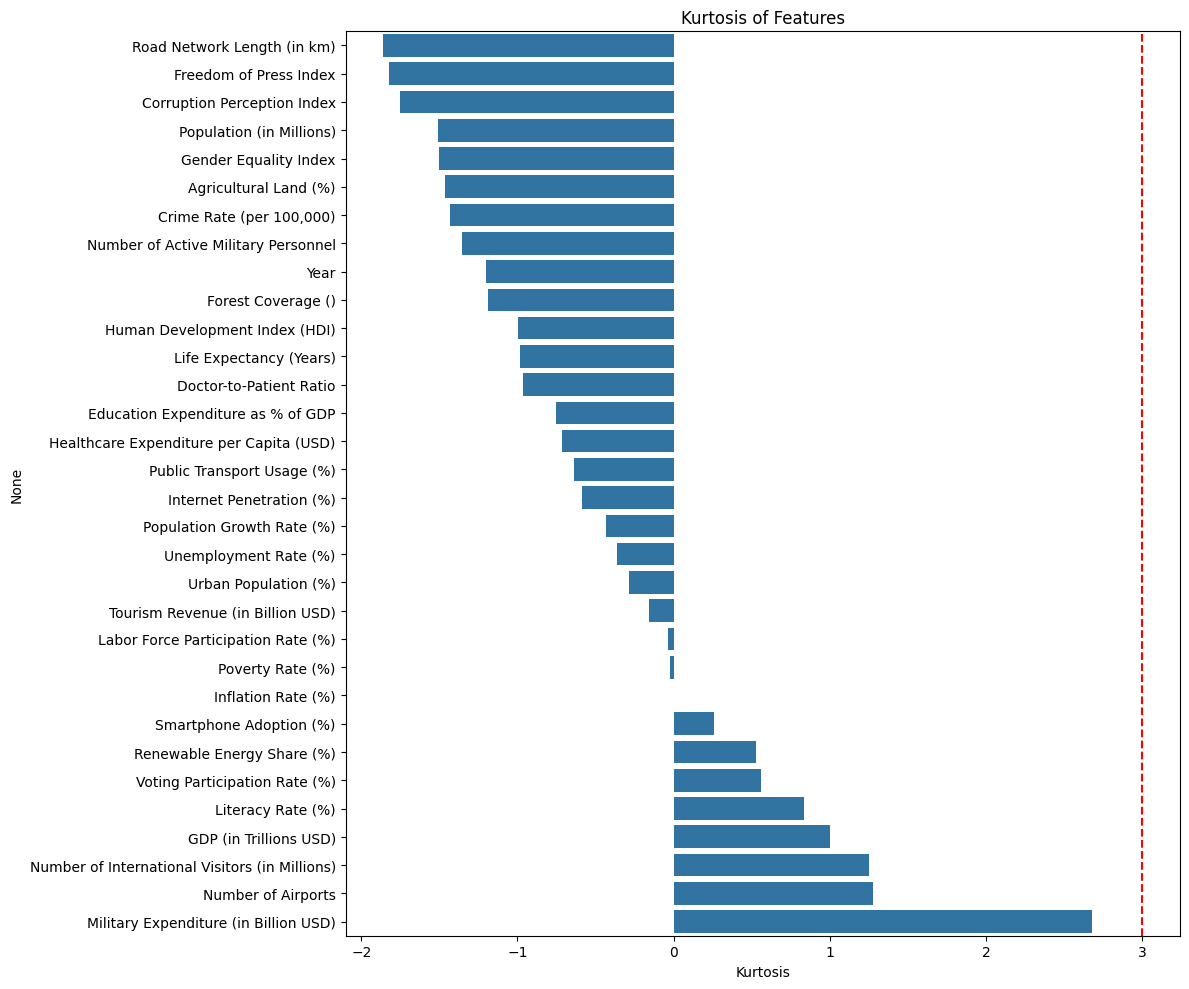

In [22]:
kurtosis_data = pd.Series({
    'Year': -1.204203,
    'GDP (in Trillions USD)':  1.000560,
    'Inflation Rate (%)': 0.001125,
    'Military Expenditure (in Billion USD)': 2.677629,
    'Number of Active Military Personnel': -1.352274,
    'Number of Airports': 1.274017,
    'Road Network Length (in km)': -1.858198,
    'Public Transport Usage (%)': -0.635987,
    'Poverty Rate (%)': -0.024071,
    'Number of International Visitors (in Millions)': 1.252816,
    'Tourism Revenue (in Billion USD)': -0.159274,
    'Agricultural Land (%)':-1.462777,
    'Unemployment Rate (%)': -0.359758,
    'Labor Force Participation Rate (%)': -0.036492,
    'Population (in Millions)':  -1.505933,
    'Population Growth Rate (%)': -0.431549,
    'Urban Population (%)': -0.287121,
    'Life Expectancy (Years)': -0.980657,
    'Healthcare Expenditure per Capita (USD)': -0.717586,
    'Doctor-to-Patient Ratio': -0.9633982,
    'Literacy Rate (%)': 0.832116,
    'Education Expenditure as % of GDP': -0.751896,
    'Internet Penetration (%)': -0.586774,
    'Smartphone Adoption (%)': 0.256600,
    'Human Development Index (HDI)': -0.996522,
    'Gender Equality Index': -1.503615,
    'Crime Rate (per 100,000)': -1.434183,
    'Corruption Perception Index':-1.753223,
    'Freedom of Press Index': -1.821807,
    'Voting Participation Rate (%)':0.559093,
    'Renewable Energy Share (%)': 0.525019,
    'Forest Coverage ()': -1.186698
})

# Sort the kurtosis values
kurtosis_data_sorted = kurtosis_data.sort_values()

# Create the plot
plt.figure(figsize=(12, 10))
sns.barplot(x=kurtosis_data_sorted.values, y=kurtosis_data_sorted.index, orient='h')
plt.title('Kurtosis of Features')
plt.xlabel('Kurtosis')
plt.axvline(x=3, color='r', linestyle='--')
plt.tight_layout()
plt.show()

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Military expenditure, GDP, and renewable energy share are positively skewed, indicating that a few countries dominate these areas while most have lower values.</li>
    <li>Negatively skewed features like literacy rate, smartphone adoption, and urban population suggest widespread global progress, with only a few lagging.</li>
    <li>Symmetrical features like the Freedom of Press Index are evenly distributed across countries, reflecting balanced variation.tails, reflecting relatively consistent patterns across countries.</li>
    <li>The variables with low or negative kurtosis, such as Road Network Length (kurtosis = -1.86) and Corruption Perception Index (kurtosis = -1.75), exhibit flatter distributions with minimal outliers, indicating more balanced variations across countries.</li>
    <li> Smartphone Adoption and Voting Participation Rate display slight peaks, suggesting some variation but not significant outliers.</li>
</ul>
</div> 

<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-size: 24px;">
<strong>3. DATA PREPARATION</strong>
</div>

<div style="background-color: #d4edda; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<strong>STEPS</strong>
<ul>
    <li>Data cleaning: missing value, Duplicate values, Data value outliers, fixing data types.</li>
    <li>Feature engineering - finding important features by different models and overlaps among the models.</li>
    <li>Outlier detection and treatment, Scaling, transformation and normalization</li>
    <li>Addressing skewness and kurtosis</li>
</div>

### 3.1 DATA CLEANING

#### Missing Values

In [23]:
print("\nNumber of Null values:\n",country.isnull().sum())


Number of Null values:
 Country                                           0
Year                                              0
GDP (in Trillions USD)                            0
GDP per Capita (in USD)                           0
Inflation Rate (%)                                0
Military Expenditure (in Billion USD)             0
Number of Active Military Personnel               0
Number of Airports                                0
Road Network Length (in km)                       0
Public Transport Usage (%)                        0
Poverty Rate (%)                                  0
Number of International Visitors (in Millions)    0
Tourism Revenue (in Billion USD)                  0
Agricultural Land (%)                             0
Unemployment Rate (%)                             0
Labor Force Participation Rate (%)                0
Population (in Millions)                          0
Population Growth Rate (%)                        0
Urban Population (%)                   

#### Duplicate Values

In [24]:
print("\nNumber of Duplicated values: ",(country.duplicated()).sum())


Number of Duplicated values:  0


#### Unique Values

In [25]:
country['Country'].unique()

array(['Australia', 'Canada', 'China', 'India', 'Russia', 'USA'],
      dtype=object)

#### Checking for Incorrect values

In [26]:
numeric_columns = country.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns[~numeric_columns.isin(['Population Growth Rate (%)','Inflation Rate (%)'])]
negative_columns = [col for col in numeric_columns if (country[col] < 0).any()]
print("Columns with negative values:", negative_columns)

Columns with negative values: []


#### Fix the DataTypes

##### Columns to convert the datatype

In [27]:
print("Number of object columns:",len(country.select_dtypes(include = ['object']).columns))
print("\nColumns with objective datatype:" ,country.select_dtypes(include = ['object']).columns)
country[['Year','Country']]=country[['Year','Country']].astype('category')

Number of object columns: 4

Columns with objective datatype: Index(['Country', 'GDP per Capita (in USD)', 'Energy Consumption (TWh)',
       'CO2 Emissions (Million Metric Tons)'],
      dtype='object')


In [28]:
columns_to_convert = ['GDP per Capita (in USD)', 'Number of Airports',
       'Energy Consumption (TWh)', 'CO2 Emissions (Million Metric Tons)','Military Expenditure (in Billion USD)','Road Network Length (in km)']
for column in columns_to_convert:
    country[column] = (country[column].astype(str).str.replace(',','',regex=False).astype(float))
country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 36 columns):
 #   Column                                          Non-Null Count  Dtype   
---  ------                                          --------------  -----   
 0   Country                                         144 non-null    category
 1   Year                                            144 non-null    category
 2   GDP (in Trillions USD)                          144 non-null    float64 
 3   GDP per Capita (in USD)                         144 non-null    float64 
 4   Inflation Rate (%)                              144 non-null    float64 
 5   Military Expenditure (in Billion USD)           144 non-null    float64 
 6   Number of Active Military Personnel             144 non-null    float64 
 7   Number of Airports                              144 non-null    float64 
 8   Road Network Length (in km)                     144 non-null    float64 
 9   Public Transport Usage (%)      

In [29]:
print("Number of categorical columns:",len(country.select_dtypes(include = ['category']).columns))
print ("\nCategorical Columns:",country.select_dtypes(include = ['category']).columns)
print("\nNumber of Numerical columns:",len(country.select_dtypes(include = ['float','int']).columns))
print ("\nNumerical Columns:",country.select_dtypes(include = ['float','int']).columns)

Number of categorical columns: 2

Categorical Columns: Index(['Country', 'Year'], dtype='object')

Number of Numerical columns: 34

Numerical Columns: Index(['GDP (in Trillions USD)', 'GDP per Capita (in USD)',
       'Inflation Rate (%)', 'Military Expenditure (in Billion USD)',
       'Number of Active Military Personnel', 'Number of Airports',
       'Road Network Length (in km)', 'Public Transport Usage (%)',
       'Poverty Rate (%)', 'Number of International Visitors (in Millions)',
       'Tourism Revenue (in Billion USD)', 'Agricultural Land (%)',
       'Unemployment Rate (%)', 'Labor Force Participation Rate (%)',
       'Population (in Millions)', 'Population Growth Rate (%)',
       'Urban Population (%)', 'Life Expectancy (Years)',
       'Healthcare Expenditure per Capita (USD)', 'Doctor-to-Patient Ratio',
       'Literacy Rate (%)', 'Education Expenditure as % of GDP',
       'Internet Penetration (%)', 'Smartphone Adoption (%)',
       'Human Development Index (HDI)', '

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Country and Year columns were converted to the category data type  and GDP per Capita (in USD), Number of Airports, Energy Consumption , and CO2 Emissions to the numerical columns.</li>
    <li>Now, dataset contains 2 categorical data and 34 numerical columns.</li>
<ul>
<div>

### 3.2 FEATURE ENGINEERING

#### Finding important features by different models

##### Pearson correlation

Top 10 features based on Pearson correlation:
Military Expenditure (in Billion USD)             0.916873
Tourism Revenue (in Billion USD)                  0.868734
Energy Consumption (TWh)                          0.853443
Number of International Visitors (in Millions)    0.838158
Number of Airports                                0.778449
CO2 Emissions (Million Metric Tons)               0.732479
Road Network Length (in km)                       0.634408
Healthcare Expenditure per Capita (USD)           0.561590
Unemployment Rate (%)                             0.552935
Crime Rate (per 100,000)                          0.483845
dtype: float64


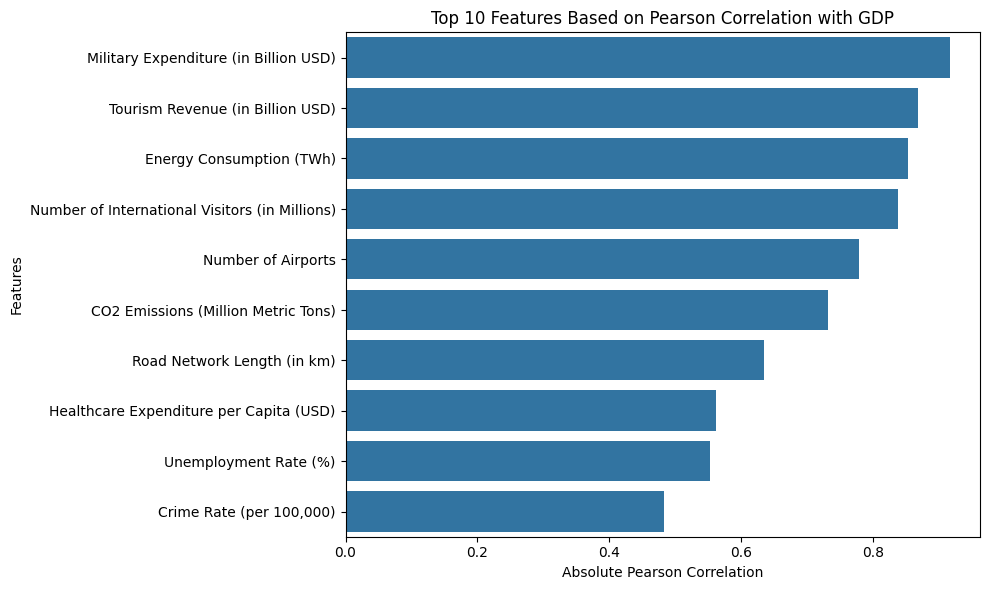

In [30]:
np.random.seed(42)
X = country.drop(columns=['GDP (in Trillions USD)', 'Country', 'Year'])
y = country['GDP (in Trillions USD)']

correlation = X.corrwith(y)
correlation = correlation.abs().sort_values(ascending=False)
top_n = 10
top_features = correlation.head(top_n).index
print(f"Top {top_n} features based on Pearson correlation:")
print(correlation.head(top_n))

# Visualize the correlation of selected features with the target
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation.head(top_n).values, y=correlation.head(top_n).index)
plt.title("Top 10 Features Based on Pearson Correlation with GDP")
plt.xlabel("Absolute Pearson Correlation")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Military Expenditure has the strongest correlation (0.91) with GDP, suggesting that countries with higher military spending tend to have higher GDP followed by other variable like  Tourism revenue,Energy consumption,Number of International vistors etc.</li>
<ul>
<div> 

##### Backward Elimination and Forward Selection

In [31]:
X = country.drop(columns=['Country', 'Year', 'GDP (in Trillions USD)'])  
y = country['GDP (in Trillions USD)']

# Adding a constant for the intercept term
X = sm.add_constant(X)

# Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    initial_features = X.columns.tolist()
    while len(initial_features) > 0:
        # Fit the model using the current features
        model = sm.OLS(y, X[initial_features]).fit()
        
        # Get the p-values of all features
        p_values = model.pvalues[1:]  # Exclude constant p-value
        max_p_value = p_values.max()
        
        # If the maximum p-value is greater than the significance level, remove the feature
        if max_p_value > significance_level:
            max_p_value_feature = p_values.idxmax()
            initial_features.remove(max_p_value_feature)
        else:
            break  # Stop if all features are significant

    print("\nSelected features after Backward Elimination:", initial_features)
    return initial_features

# Forward Selection
def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = X.columns.tolist()
    while len(remaining_features) > 0:
        best_p_value = float('inf')
        best_feature = None
        
        # Test adding each feature to the model and calculate p-value
        for feature in remaining_features:
            features_to_test = initial_features + [feature]
            model = sm.OLS(y, X[features_to_test]).fit()
            p_value = model.pvalues[feature]
            
            if p_value < best_p_value:
                best_p_value = p_value
                best_feature = feature
        
        # If the best p-value is smaller than the significance level, add the feature
        if best_p_value < significance_level:
            initial_features.append(best_feature)
            remaining_features.remove(best_feature)
        else:
            break  # Stop if no feature is significant

    print("\nSelected features after Forward Selection:", initial_features)
    return initial_features

# Perform Backward Elimination
selected_features_backward = backward_elimination(X, y, significance_level=0.05)

# Perform Forward Selection
selected_features_forward = forward_selection(X, y, significance_level=0.05)

# Optionally, you can refit the model using the selected features and compare the scores
X_train, X_test, y_train, y_test = train_test_split(X[selected_features_backward], y, test_size=0.3, random_state=0)
model = LinearRegression()
model.fit(X_train, y_train)
print("\nR-squared after Backward Elimination:", model.score(X_test, y_test))

X_train, X_test, y_train, y_test = train_test_split(X[selected_features_forward], y, test_size=0.3, random_state=0)
model.fit(X_train, y_train)
print("\nR-squared after Forward Selection:", model.score(X_test, y_test))


Selected features after Backward Elimination: ['const', 'GDP per Capita (in USD)', 'Military Expenditure (in Billion USD)', 'Number of Active Military Personnel', 'Number of Airports', 'Agricultural Land (%)', 'Urban Population (%)', 'Healthcare Expenditure per Capita (USD)', 'Energy Consumption (TWh)', 'Forest Coverage ()']

Selected features after Forward Selection: ['Military Expenditure (in Billion USD)', 'Energy Consumption (TWh)', 'Number of Active Military Personnel', 'Population (in Millions)', 'Number of Airports', 'GDP per Capita (in USD)', 'Urban Population (%)', 'Corruption Perception Index']

R-squared after Backward Elimination: 0.9786636813469604

R-squared after Forward Selection: 0.9785242887527403


<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>The high R-squared value of 0.9787 indicates that the model explains approximately 97.87% of the variance in GDP using the selected features which suggests a well-fitted model, as nearly all the variability in the target is accounted for.</li>
<ul>
<div>

#### Finding overlaps among the models


Features selected by Pearson Correlation: ['Military Expenditure (in Billion USD)', 'Number of Airports', 'Road Network Length (in km)', 'Number of International Visitors (in Millions)', 'Tourism Revenue (in Billion USD)', 'Unemployment Rate (%)', 'Healthcare Expenditure per Capita (USD)', 'Energy Consumption (TWh)', 'CO2 Emissions (Million Metric Tons)']

Features selected by Backward Elimination: ['GDP per Capita (in USD)', 'Military Expenditure (in Billion USD)', 'Number of Active Military Personnel', 'Number of Airports', 'Agricultural Land (%)', 'Urban Population (%)', 'Healthcare Expenditure per Capita (USD)', 'Energy Consumption (TWh)', 'Forest Coverage ()']

Features selected by Forward Selection: ['Military Expenditure (in Billion USD)', 'Energy Consumption (TWh)', 'GDP per Capita (in USD)', 'Number of Airports', 'Urban Population (%)']

Features selected by all three methods (Pearson Correlation, Backward Elimination, Forward Selection):
{'Energy Consumption (TWh)', 'Number 

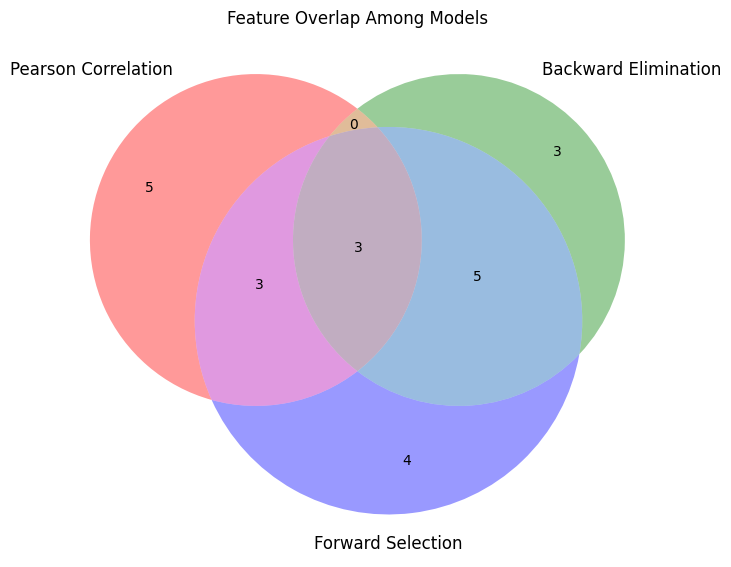

In [32]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS, add_constant
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Assuming `country` DataFrame is already loaded and cleaned
X = country.drop(columns=['Country', 'Year', 'GDP (in Trillions USD)'])  # Exclude non-numeric features
y = country['GDP (in Trillions USD)']

# Step 1: Pearson Correlation Analysis
correlation_with_target = X.corrwith(y).abs()  # Calculate absolute correlation
correlation_features = correlation_with_target[correlation_with_target > 0.5].index.tolist()  # Threshold of 0.5

# Print selected features
print("\nFeatures selected by Pearson Correlation:", correlation_features)

# Step 2: Backward Elimination
def backward_elimination(X, y, significance_level=0.05):
    X_with_constant = add_constant(X)
    while True:
        model = OLS(y, X_with_constant).fit()
        p_values = model.pvalues[1:]  # Exclude the constant
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            max_p_feature = p_values.idxmax()
            X_with_constant = X_with_constant.drop(columns=[max_p_feature])
        else:
            break
    return X_with_constant.columns.tolist()[1:]  # Exclude the constant

selected_features_backward = backward_elimination(X, y)
print("\nFeatures selected by Backward Elimination:", selected_features_backward)

# Step 3: Forward Selection
def forward_selection(X, y, significance_level=0.05):
    initial_features = []
    remaining_features = list(X.columns)
    while remaining_features:
        p_values = []
        for feature in remaining_features:
            selected_features = initial_features + [feature]
            X_selected = add_constant(X[selected_features])
            model = OLS(y, X_selected).fit()
            p_values.append((feature, model.pvalues[feature]))
        feature, p_value = min(p_values, key=lambda x: x[1])
        if p_value < significance_level:
            initial_features.append(feature)
            remaining_features.remove(feature)
        else:
            break
    return initial_features

selected_features_forward = forward_selection(X, y)
print("\nFeatures selected by Forward Selection:", selected_features_forward)

# Step 4: Find overlaps among the three methods
overlap_features = set(correlation_features).intersection(selected_features_backward).intersection(selected_features_forward)

print("\nFeatures selected by all three methods (Pearson Correlation, Backward Elimination, Forward Selection):")
print(overlap_features)

# Step 5: Visualize using a Venn diagram

plt.figure(figsize=(8, 8))

# Prepare subsets for Venn diagram
only_correlation = set(correlation_features) - set(selected_features_backward) - set(selected_features_forward)
only_backward = set(selected_features_backward) - set(correlation_features) - set(selected_features_forward)
only_forward = set(selected_features_forward) - set(correlation_features) - set(selected_features_backward)

overlap_backward_forward = set(selected_features_backward).intersection(set(selected_features_forward))
overlap_correlation_backward = set(correlation_features).intersection(set(selected_features_backward))
overlap_correlation_forward = set(correlation_features).intersection(set(selected_features_forward))

# All three methods overlap
overlap_all = overlap_correlation_backward.intersection(overlap_correlation_forward)

venn3(
    subsets=(
        len(only_correlation),           # Only Pearson Correlation
        len(only_backward),              # Only Backward Elimination
        len(only_forward),               # Only Forward Selection
        len(overlap_correlation_backward), # pearson & Backward
        len(overlap_correlation_forward), # pearson & forward
        len(overlap_backward_forward),   # Backward & Forward Selection
        len(overlap_all),                # All three methods overlap
    ),
    set_labels=("Pearson Correlation", "Backward Elimination", "Forward Selection")
)
plt.title("Feature Overlap Among Models")
plt.show()

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>The overlap graph highlights that 'Number of Airports', 'Military Expenditure (in Billion USD)', and 'Energy Consumption (TWh)' are consistently selected by all three methods—Pearson Correlation, Backward Elimination, and Forward Selection—indicating their significance across different feature selection techniques.</li>
<ul>
<div>  

### 3.3 SCALING TRANSFORMATION, NORMALIZATION

#### Outlier Detection

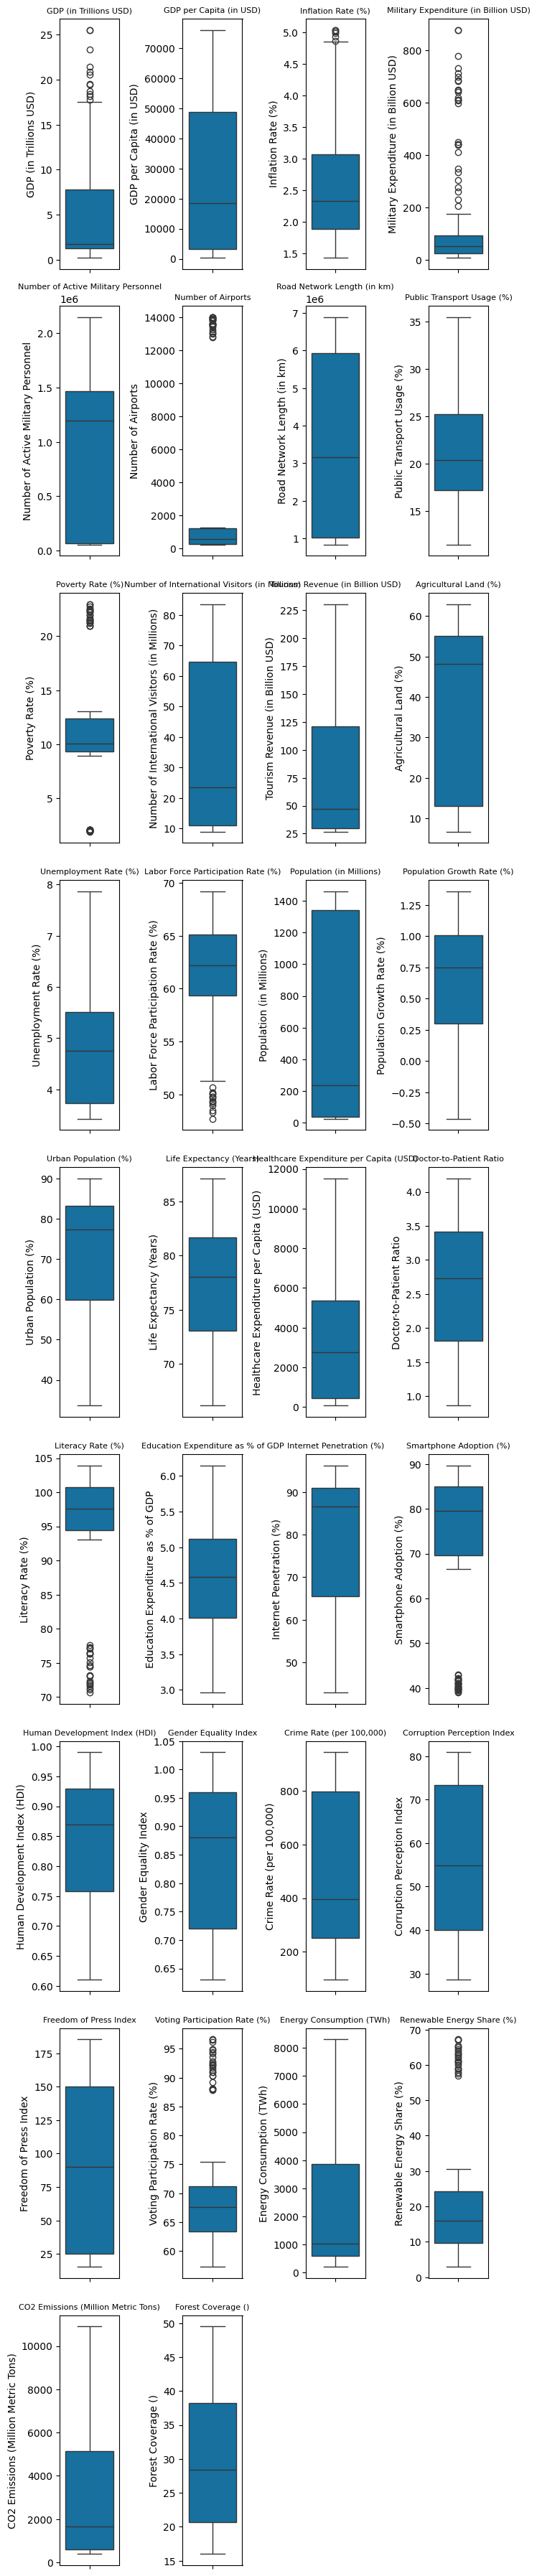

In [33]:
# Ensure columns are numeric
numeric_cols = country.select_dtypes(include=['float64', 'int64']).columns
 
# Calculate the grid size based on the number of numeric columns
n_cols = 4
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Round up to fit all columns
 
plt.figure(figsize=(7, n_rows * 4))  # Adjust height based on number of rows
for i, col in enumerate(numeric_cols, 1):  # Start subplot index from 1
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(data=country, y=col, color='#0077B5')  # Add color with Seaborn
    plt.title(col, fontsize = 8)  
 
plt.tight_layout() 
plt.show()

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Many attributes got outliers, however we cannot consider these as outliers due to the huge difference in the values between the developed and developing countries. Hence we need to split the data before removing outliers.</li>
<ul>
<div>

### COUNTRYWISE DATA SPLIT

In [34]:
grouped_by_country = country.groupby('Country',observed=False)
australia_data = grouped_by_country.get_group('Australia')
canada_data = grouped_by_country.get_group('Canada')
china_data = grouped_by_country.get_group('China')
india_data = grouped_by_country.get_group('India')
russia_data = grouped_by_country.get_group('Russia')
usa_data = grouped_by_country.get_group('USA')
australia_data.to_csv("Australia_data.csv", index=False)
canada_data.to_csv("Canada_data.csv", index=False)
china_data.to_csv("China_data.csv", index=False)
india_data.to_csv("India_data.csv", index=False)
russia_data.to_csv("Russia_data.csv", index=False)
usa_data.to_csv("USA_data.csv", index=False)
numeric_columns = country.select_dtypes(include=['float64','int64']).columns
grouped_country = country.groupby('Country',observed=True)
for country_name, group in grouped_country:
    print(f"\nOutliers for {country_name}:")
    found_outliers = False  
    
    for column in numeric_columns:
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
                
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
                
        outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
               
        if not outliers.empty:
            found_outliers = True
            print(f"\nOutliers in '{column}':")
            print(outliers[[column]])
       
    if not found_outliers:
        print("No outliers found for this country.")


Outliers for Australia:

Outliers in 'Renewable Energy Share (%)':
     Renewable Energy Share (%)
126                        29.9
132                        30.5

Outliers for Canada:

Outliers in 'CO2 Emissions (Million Metric Tons)':
     CO2 Emissions (Million Metric Tons)
121                                540.0
127                                540.0

Outliers for China:
No outliers found for this country.

Outliers for India:
No outliers found for this country.

Outliers for Russia:

Outliers in 'Military Expenditure (in Billion USD)':
   Military Expenditure (in Billion USD)
4                                   26.0

Outliers for USA:
No outliers found for this country.


<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Now only three outliers which is 'Renewable Energy Share (%)' for australia,'CO2 Emissions (Million Metric Tons)'for canada and 'Military Expenditure (in Billion USD)' for USA</li>
<ul>
<div>

#### Fixing Countrywise Outliers

#### Australia

##### Winsorizing method/ Capping Values

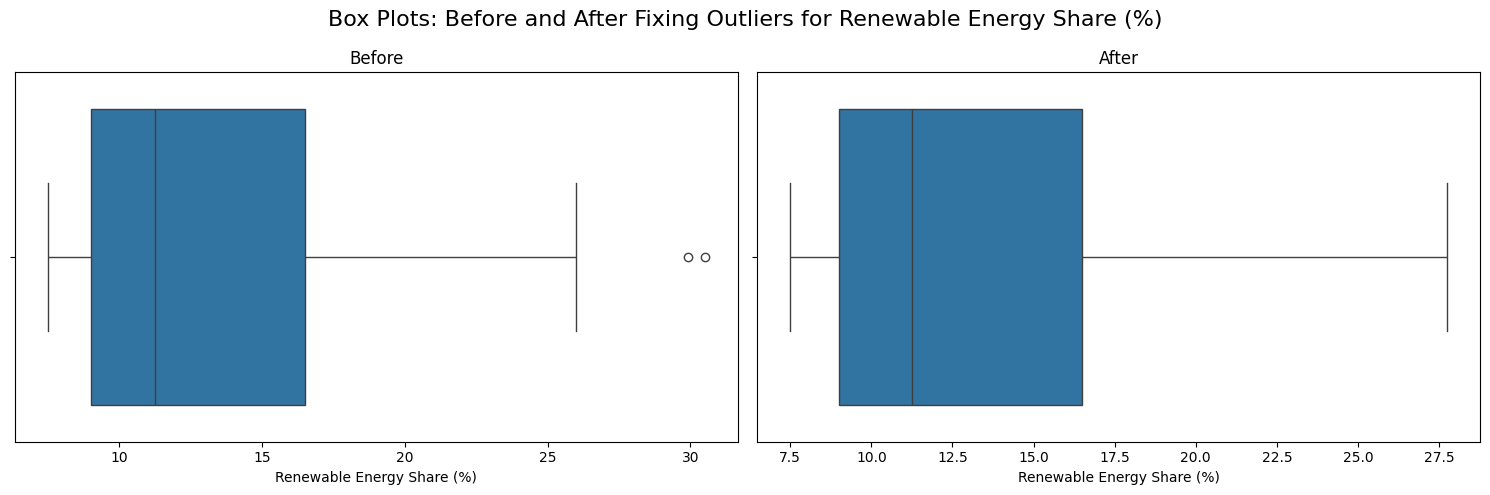

In [35]:
australia_data = grouped_by_country.get_group('Australia')
australia_data = australia_data.select_dtypes(include=['float64', 'int64'])
original_data = australia_data.copy()

# Apply the clipping method to fix outliers for Renewable Energy Share (%)
col = 'Renewable Energy Share (%)'
Q1 = australia_data[col].quantile(0.25)
Q3 = australia_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
australia_data.loc[:, col] = australia_data[col].clip(lower=lower_bound, upper=upper_bound)

# Create a figure with subplots for Renewable Energy Share (%)
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Box Plots: Before and After Fixing Outliers for Renewable Energy Share (%)', fontsize=16)

# Plot original data
sns.boxplot(x=original_data[col], ax=ax1)
ax1.set_title('Before')

# Plot data after fixing outliers
sns.boxplot(x=australia_data[col], ax=ax2)
ax2.set_title('After')

plt.tight_layout()
plt.show()

#### Scaling, standardizing and normalizing of Australia

In [36]:
# Ensure top_features is a list before indexing the DataFrame
top_features = list(set(correlation_features).intersection(selected_features_backward).intersection(selected_features_forward))

# Create a DataFrame with the selected features
df_top_features = australia_data[top_features].copy()

# List to hold columns that are not normally distributed
not_normal_columns = []

# Check for normality using the Shapiro-Wilk test
for col in df_top_features.columns:
    stat, p_value = shapiro(df_top_features[col].dropna())
    if p_value <= 0.05:
        not_normal_columns.append(col)
        print(f"{col}: Not normally distributed (p-value = {p_value:.4f})")

# Output the list of columns that are not normally distributed
print(f"\nColumns that are not normally distributed: {not_normal_columns}")

# Create a new DataFrame for transformed data
transformed_data = df_top_features.copy()

# Apply Square Root Transformation for positively skewed data
# Apply Log Transformation for negatively skewed data
for feature in not_normal_columns:
    skewness = transformed_data[feature].skew()

    if skewness > 0:  # Positively skewed
        print(f"Applying Square Root Transformation for positively skewed feature: {feature}")
        transformed_data[feature] = np.sqrt(transformed_data[feature])
    elif skewness < 0:  # Negatively skewed
        print(f"Applying Log Transformation for negatively skewed feature: {feature}")
        # Reflect and apply log (add a constant to make it positive)
        transformed_data[feature] = np.log1p(transformed_data[feature].max() - transformed_data[feature])
    else:
        print(f"No transformation applied for {feature} as skewness is close to 0.")

# Update the original dataset with the transformed features
australia_data.update(transformed_data)

# Recheck normality after transformations
remaining_not_normal_columns = []

for feature in not_normal_columns:
    stat, p_value = shapiro(transformed_data[feature].dropna())
    print(f"\nShapiro-Wilk test for '{feature}' after transformation:")
    print(f"Statistics: {stat:.3f}, p-value: {p_value:.3f}")

    # Interpret the result
    if p_value > 0.05:
        print(f"'{feature}' is likely normally distributed after transformation (fail to reject H0).")
    else:
        print(f"'{feature}' is still not normally distributed after transformation (reject H0).")
        remaining_not_normal_columns.append(feature)

# Save the updated dataset to a CSV file
australia_data.to_csv('australia_updated.csv', index=False)
print("\nUpdated Australia dataset saved successfully.")

Number of Airports: Not normally distributed (p-value = 0.0174)

Columns that are not normally distributed: ['Number of Airports']
Applying Square Root Transformation for positively skewed feature: Number of Airports

Shapiro-Wilk test for 'Number of Airports' after transformation:
Statistics: 0.896, p-value: 0.018
'Number of Airports' is still not normally distributed after transformation (reject H0).

Updated Australia dataset saved successfully.


#### Canada

##### Winsorizing method/ Capping Values

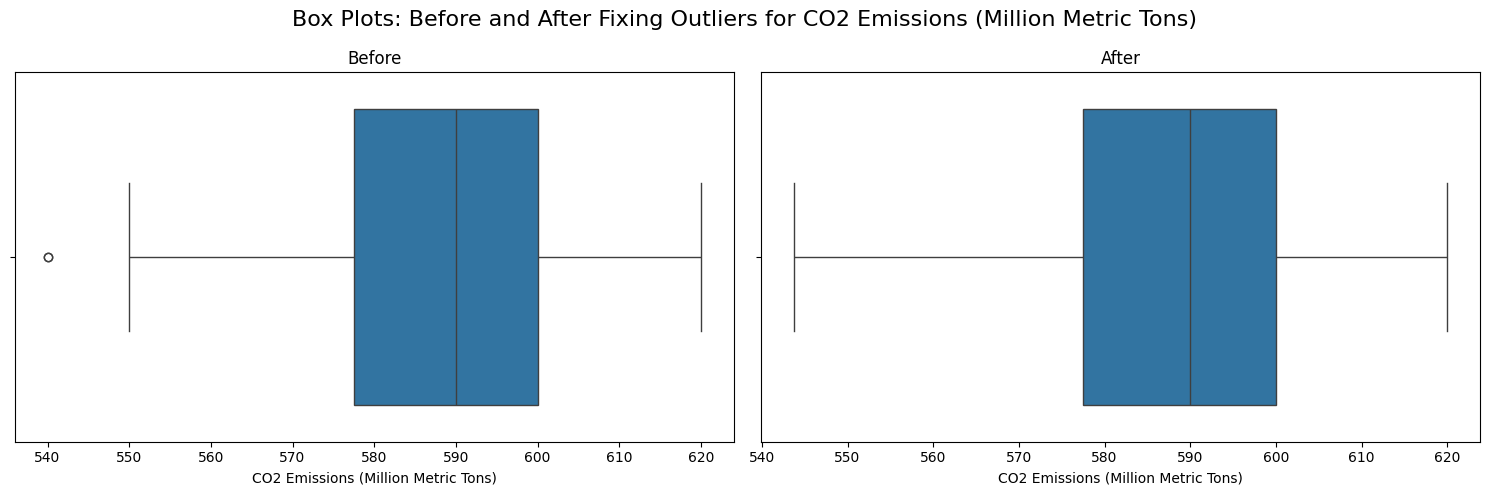

In [37]:
canada_data = grouped_by_country.get_group('Canada')
canada_data = canada_data.select_dtypes(include=['float64', 'int64'])
original_data = canada_data.copy()

# Apply the clipping method to fix outliers for 'CO2 Emissions (Million Metric Tons)'
col = 'CO2 Emissions (Million Metric Tons)'
Q1 = canada_data[col].quantile(0.25)
Q3 = canada_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
canada_data.loc[:, col] = canada_data[col].clip(lower=lower_bound, upper=upper_bound)

# Create a figure with subplots for 'CO2 Emissions (Million Metric Tons)'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Box Plots: Before and After Fixing Outliers for CO2 Emissions (Million Metric Tons)', fontsize=16)

# Plot original data
sns.boxplot(x=original_data[col], ax=ax1)
ax1.set_title('Before')

# Plot data after fixing outliers
sns.boxplot(x=canada_data[col], ax=ax2)
ax2.set_title('After')

plt.tight_layout()
plt.show()

#### Scaling, standardizing and normalizing of Canada

In [38]:
# Ensure top_features is a list before indexing the DataFrame
top_features = list(set(correlation_features).intersection(selected_features_backward).intersection(selected_features_forward))

# Create a DataFrame with the selected features
df_top_features = canada_data[top_features].copy()

# List to hold columns that are not normally distributed
not_normal_columns = []

# Check for normality using the Shapiro-Wilk test
for col in df_top_features.columns:
    stat, p_value = shapiro(df_top_features[col].dropna())
    if p_value <= 0.05:
        not_normal_columns.append(col)
        print(f"{col}: Not normally distributed (p-value = {p_value:.4f})")

# Output the list of columns that are not normally distributed
print(f"\nColumns that are not normally distributed: {not_normal_columns}")

# Create a new DataFrame for transformed data
transformed_data = df_top_features.copy()

# Apply Square Root Transformation for positively skewed data
# Apply Log Transformation for negatively skewed data
for feature in not_normal_columns:
    skewness = transformed_data[feature].skew()

    if skewness > 0:  # Positively skewed
        print(f"Applying Square Root Transformation for positively skewed feature: {feature}")
        transformed_data[feature] = np.sqrt(transformed_data[feature])
    elif skewness < 0:  # Negatively skewed
        print(f"Applying Log Transformation for negatively skewed feature: {feature}")
        # Reflect and apply log (add a constant to make it positive)
        transformed_data[feature] = np.log1p(transformed_data[feature].max() - transformed_data[feature])
    else:
        print(f"No transformation applied for {feature} as skewness is close to 0.")

# Update the original dataset with the transformed features
canada_data.update(transformed_data)

# Recheck normality after transformations
remaining_not_normal_columns = []

for feature in not_normal_columns:
    stat, p_value = shapiro(transformed_data[feature].dropna())
    print(f"\nShapiro-Wilk test for '{feature}' after transformation:")
    print(f"Statistics: {stat:.3f}, p-value: {p_value:.3f}")

    # Interpret the result
    if p_value > 0.05:
        print(f"'{feature}' is likely normally distributed after transformation (fail to reject H0).")
    else:
        print(f"'{feature}' is still not normally distributed after transformation (reject H0).")
        remaining_not_normal_columns.append(feature)

# Save the updated dataset to a CSV file
canada_data.to_csv('canada_updated.csv', index=False)
print("\nUpdated Canada dataset saved successfully.")


Columns that are not normally distributed: []

Updated Canada dataset saved successfully.


#### Russia

##### Winsorizing method/ Capping Values

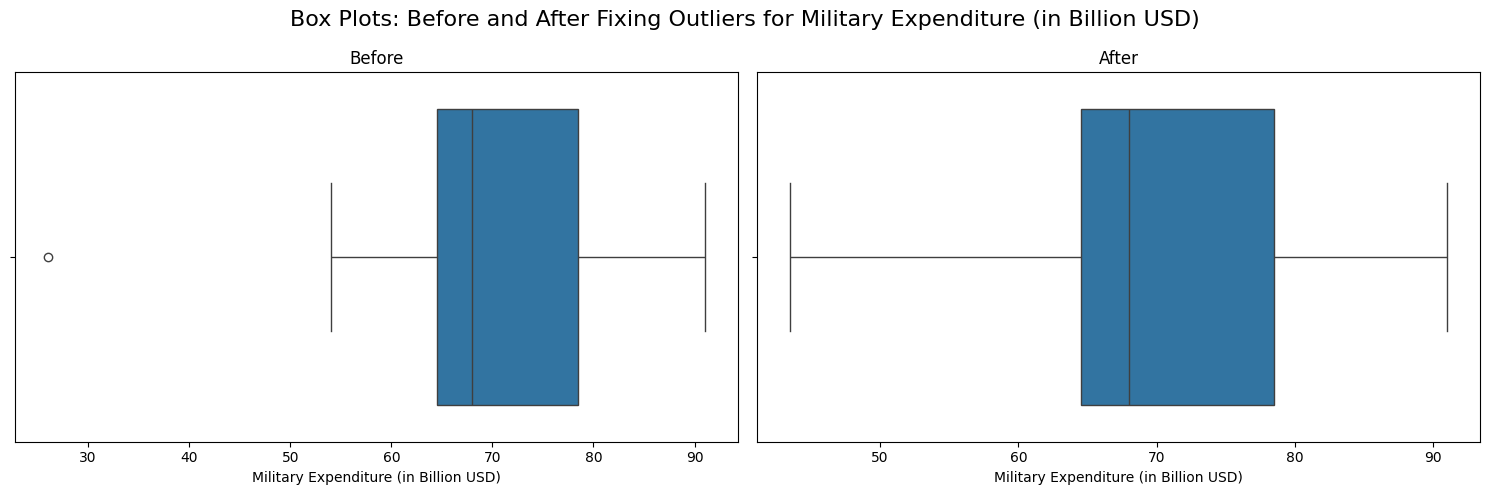

In [39]:
russia_data = grouped_by_country.get_group('Russia')
russia_data = russia_data.select_dtypes(include=['float64', 'int64'])
original_data = russia_data.copy()

# Apply the clipping method to fix outliers for Military Expenditure (in Billion USD)
col = 'Military Expenditure (in Billion USD)'
Q1 = russia_data[col].quantile(0.25)
Q3 = russia_data[col].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Clip the values and explicitly cast to float64 (to avoid dtype incompatibility)
russia_data[col] = russia_data[col].clip(lower=lower_bound, upper=upper_bound).astype('float64')

# Create a figure with subplots for 'Military Expenditure (in Billion USD)'
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Box Plots: Before and After Fixing Outliers for Military Expenditure (in Billion USD)', fontsize=16)

# Plot original data
sns.boxplot(x=original_data[col], ax=ax1)
ax1.set_title('Before')

# Plot data after fixing outliers
sns.boxplot(x=russia_data[col], ax=ax2)
ax2.set_title('After')

plt.tight_layout()
plt.show()

#### Scaling, standardizing and normalizing of Russia

In [40]:
# Ensure top_features is a list before indexing the DataFrame
top_features = list(set(correlation_features).intersection(selected_features_backward).intersection(selected_features_forward))

# Create a DataFrame with the selected features
df_top_features = russia_data[top_features].copy()

# List to hold columns that are not normally distributed
not_normal_columns = []

# Check for normality using the Shapiro-Wilk test
for col in df_top_features.columns:
    stat, p_value = shapiro(df_top_features[col].dropna())
    if p_value <= 0.05:
        not_normal_columns.append(col)
        print(f"{col}: Not normally distributed (p-value = {p_value:.4f})")

# Output the list of columns that are not normally distributed
print(f"\nColumns that are not normally distributed: {not_normal_columns}")

# Create a new DataFrame for transformed data
transformed_data = df_top_features.copy()

# Apply Square Root Transformation for positively skewed data
# Apply Log Transformation for negatively skewed data
for feature in not_normal_columns:
    skewness = transformed_data[feature].skew()

    if skewness > 0:  # Positively skewed
        print(f"Applying Square Root Transformation for positively skewed feature: {feature}")
        transformed_data[feature] = np.sqrt(transformed_data[feature])
    elif skewness < 0:  # Negatively skewed
        print(f"Applying Log Transformation for negatively skewed feature: {feature}")
        # Reflect and apply log (add a constant to make it positive)
        transformed_data[feature] = np.log1p(transformed_data[feature].max() - transformed_data[feature])
    else:
        print(f"No transformation applied for {feature} as skewness is close to 0.")

# Update the original dataset with the transformed features
russia_data.update(transformed_data)

# Recheck normality after transformations
remaining_not_normal_columns = []

for feature in not_normal_columns:
    stat, p_value = shapiro(transformed_data[feature].dropna())
    print(f"\nShapiro-Wilk test for '{feature}' after transformation:")
    print(f"Statistics: {stat:.3f}, p-value: {p_value:.3f}")

    # Interpret the result
    if p_value > 0.05:
        print(f"'{feature}' is likely normally distributed after transformation (fail to reject H0).")
    else:
        print(f"'{feature}' is still not normally distributed after transformation (reject H0).")
        remaining_not_normal_columns.append(feature)

# Save the updated dataset to a CSV file
russia_data.to_csv('russia_updated.csv', index=False)
print("\nUpdated Russia dataset saved successfully.")

Number of Airports: Not normally distributed (p-value = 0.0331)

Columns that are not normally distributed: ['Number of Airports']
Applying Log Transformation for negatively skewed feature: Number of Airports

Shapiro-Wilk test for 'Number of Airports' after transformation:
Statistics: 0.849, p-value: 0.002
'Number of Airports' is still not normally distributed after transformation (reject H0).

Updated Russia dataset saved successfully.


#### China

#### Scaling, standardizing and normalizing of China

In [41]:
import numpy as np
import pandas as pd


# Ensure top_features is a list before indexing the DataFrame
top_features = list(set(correlation_features).intersection(selected_features_backward).intersection(selected_features_forward))

# Check if top_features are valid columns in china_data
top_features = [feature for feature in top_features if feature in china_data.columns]
if not top_features:
    print("No valid features to process. Please check your feature lists.")
else:
    print(f"Processing {len(top_features)} features.")

# Create a DataFrame with the selected features
df_top_features = china_data[top_features].copy()

# List to hold columns that are not normally distributed
not_normal_columns = []

# Check for normality using the Shapiro-Wilk test
for col in df_top_features.columns:
    if df_top_features[col].dropna().empty:
        print(f"Warning: {col} has no non-null values.")
        continue
    stat, p_value = shapiro(df_top_features[col].dropna())
    if p_value <= 0.05:
        not_normal_columns.append(col)
        print(f"{col}: Not normally distributed (p-value = {p_value:.4f})")

# Output the list of columns that are not normally distributed
print(f"\nColumns that are not normally distributed: {not_normal_columns}")

# Create a new DataFrame for transformed data
transformed_data = df_top_features.copy()

# Apply Square Root Transformation for positively skewed data
# Apply Log Transformation for negatively skewed data
for feature in not_normal_columns:
    skewness = skew(transformed_data[feature].dropna())

    if skewness > 0:  # Positively skewed
        print(f"Applying Square Root Transformation for positively skewed feature: {feature}")
        transformed_data[feature] = np.sqrt(transformed_data[feature] - transformed_data[feature].min() + 1e-6)
    elif skewness < 0:  # Negatively skewed
        print(f"Applying Log Transformation for negatively skewed feature: {feature}")
        # Reflect and apply log (add a constant to make it positive)
        transformed_data[feature] = np.log1p(transformed_data[feature].max() - transformed_data[feature] + 1e-6)
    else:
        print(f"No transformation applied for {feature} as skewness is close to 0.")

    # Explicitly cast to float64 to avoid dtype issues when updating the original DataFrame
    transformed_data[feature] = transformed_data[feature].astype(np.float64)

# Ensure that china_data has the correct dtype for the columns to match transformed_data
china_data.loc[:, top_features] = china_data.loc[:, top_features].astype(np.float64)

# Update the original dataset with the transformed features
china_data.update(transformed_data.astype('float64'))

# Recheck normality after transformations
remaining_not_normal_columns = []

for feature in not_normal_columns:
    if transformed_data[feature].dropna().empty:
        print(f"Warning: {feature} has no non-null values after transformation.")
        continue
    stat, p_value = shapiro(transformed_data[feature].dropna())
    print(f"\nShapiro-Wilk test for '{feature}' after transformation:")
    print(f"Statistics: {stat:.3f}, p-value: {p_value:.3f}")

    # Interpret the result
    if p_value > 0.05:
        print(f"'{feature}' is likely normally distributed after transformation (fail to reject H0).")
    else:
        print(f"'{feature}' is still not normally distributed after transformation (reject H0).")
        remaining_not_normal_columns.append(feature)

# Output the list of columns that are still not normally distributed
if remaining_not_normal_columns:
    print(f"\nColumns still not normally distributed after transformation: {remaining_not_normal_columns}")
else:
    print("\nAll columns are normally distributed after transformation.")

# Save the updated dataset to a CSV file
china_data.to_csv('china_updated.csv', index=False)
print("\nUpdated China dataset saved successfully.")

Processing 3 features.
Energy Consumption (TWh): Not normally distributed (p-value = 0.0396)
Military Expenditure (in Billion USD): Not normally distributed (p-value = 0.0401)

Columns that are not normally distributed: ['Energy Consumption (TWh)', 'Military Expenditure (in Billion USD)']
Applying Square Root Transformation for positively skewed feature: Energy Consumption (TWh)
Applying Square Root Transformation for positively skewed feature: Military Expenditure (in Billion USD)

Shapiro-Wilk test for 'Energy Consumption (TWh)' after transformation:
Statistics: 0.942, p-value: 0.180
'Energy Consumption (TWh)' is likely normally distributed after transformation (fail to reject H0).

Shapiro-Wilk test for 'Military Expenditure (in Billion USD)' after transformation:
Statistics: 0.966, p-value: 0.582
'Military Expenditure (in Billion USD)' is likely normally distributed after transformation (fail to reject H0).

All columns are normally distributed after transformation.

Updated China 

#### India

#### Scaling, standardizing and normalizing of India

In [42]:
# Ensure top_features is a list before indexing the DataFrame
top_features = list(set(correlation_features).intersection(selected_features_backward).intersection(selected_features_forward))

# Create a DataFrame with the selected features
df_top_features = india_data[top_features].copy()

# List to hold columns that are not normally distributed
not_normal_columns = []

# Check for normality using the Shapiro-Wilk test
for col in df_top_features.columns:
    stat, p_value = shapiro(df_top_features[col].dropna())
    if p_value <= 0.05:
        not_normal_columns.append(col)
        print(f"{col}: Not normally distributed (p-value = {p_value:.4f})")

# Output the list of columns that are not normally distributed
print(f"\nColumns that are not normally distributed: {not_normal_columns}")

# Create a new DataFrame for transformed data
transformed_data = df_top_features.copy()

# Apply Square Root Transformation for positively skewed data
# Apply Log Transformation for negatively skewed data
for feature in not_normal_columns:
    skewness = transformed_data[feature].skew()

    if skewness > 0:  # Positively skewed
        print(f"Applying Square Root Transformation for positively skewed feature: {feature}")
        transformed_data[feature] = np.sqrt(transformed_data[feature])
    elif skewness < 0:  # Negatively skewed
        print(f"Applying Log Transformation for negatively skewed feature: {feature}")
        # Reflect and apply log (add a constant to make it positive)
        transformed_data[feature] = np.log1p(transformed_data[feature].max() - transformed_data[feature])
    else:
        print(f"No transformation applied for {feature} as skewness is close to 0.")

# Update the original dataset with the transformed features
india_data.update(transformed_data)

# Recheck normality after transformations
remaining_not_normal_columns = []

for feature in not_normal_columns:
    stat, p_value = shapiro(transformed_data[feature].dropna())
    print(f"\nShapiro-Wilk test for '{feature}' after transformation:")
    print(f"Statistics: {stat:.3f}, p-value: {p_value:.3f}")

    # Interpret the result
    if p_value > 0.05:
        print(f"'{feature}' is likely normally distributed after transformation (fail to reject H0).")
    else:
        print(f"'{feature}' is still not normally distributed after transformation (reject H0).")
        remaining_not_normal_columns.append(feature)

# Save the updated dataset to a CSV file
india_data.to_csv('india_updated.csv', index=False)
print("\nUpdated Australia dataset saved successfully.")

Number of Airports: Not normally distributed (p-value = 0.0496)

Columns that are not normally distributed: ['Number of Airports']
Applying Square Root Transformation for positively skewed feature: Number of Airports

Shapiro-Wilk test for 'Number of Airports' after transformation:
Statistics: 0.918, p-value: 0.053
'Number of Airports' is likely normally distributed after transformation (fail to reject H0).

Updated Australia dataset saved successfully.


#### USA

#### Scaling, standardizing and normalizing of USA

In [43]:
# Ensure top_features is a list before indexing the DataFrame
top_features = list(set(correlation_features).intersection(selected_features_backward).intersection(selected_features_forward))

# Create a DataFrame with the selected features
df_top_features = usa_data[top_features].copy()

# List to hold columns that are not normally distributed
not_normal_columns = []

# Check for normality using the Shapiro-Wilk test
for col in df_top_features.columns:
    stat, p_value = shapiro(df_top_features[col].dropna())
    if p_value <= 0.05:
        not_normal_columns.append(col)
        print(f"{col}: Not normally distributed (p-value = {p_value:.4f})")

# Output the list of columns that are not normally distributed
print(f"\nColumns that are not normally distributed: {not_normal_columns}")

# Create a new DataFrame for transformed data
transformed_data = df_top_features.copy()

# Apply Square Root Transformation for positively skewed data
# Apply Log Transformation for negatively skewed data
for feature in not_normal_columns:
    skewness = transformed_data[feature].skew()

    if skewness > 0:  # Positively skewed
        print(f"Applying Square Root Transformation for positively skewed feature: {feature}")
        transformed_data[feature] = np.sqrt(transformed_data[feature])
    elif skewness < 0:  # Negatively skewed
        print(f"Applying Log Transformation for negatively skewed feature: {feature}")
        # Reflect and apply log (add a constant to make it positive)
        transformed_data[feature] = np.log1p(transformed_data[feature].max() - transformed_data[feature])
    else:
        print(f"No transformation applied for {feature} as skewness is close to 0.")

# Update the original dataset with the transformed features
usa_data.update(transformed_data)

# Recheck normality after transformations
remaining_not_normal_columns = []

for feature in not_normal_columns:
    stat, p_value = shapiro(transformed_data[feature].dropna())
    print(f"\nShapiro-Wilk test for '{feature}' after transformation:")
    print(f"Statistics: {stat:.3f}, p-value: {p_value:.3f}")

    # Interpret the result
    if p_value > 0.05:
        print(f"'{feature}' is likely normally distributed after transformation (fail to reject H0).")
    else:
        print(f"'{feature}' is still not normally distributed after transformation (reject H0).")
        remaining_not_normal_columns.append(feature)

# Save the updated dataset to a CSV file
usa_data.to_csv('usa_updated.csv', index=False)
print("\nUpdated USA dataset saved successfully.")

Number of Airports: Not normally distributed (p-value = 0.0251)

Columns that are not normally distributed: ['Number of Airports']
Applying Log Transformation for negatively skewed feature: Number of Airports

Shapiro-Wilk test for 'Number of Airports' after transformation:
Statistics: 0.740, p-value: 0.000
'Number of Airports' is still not normally distributed after transformation (reject H0).

Updated USA dataset saved successfully.


#### combined the splitwise country dataset back to single dataset

In [44]:
australia_data = pd.read_csv("Australia_data.csv")
canada_data = pd.read_csv("Canada_data.csv")
china_data = pd.read_csv("China_data.csv")
india_data = pd.read_csv("India_data.csv")
russia_data = pd.read_csv("Russia_data.csv")
usa_data = pd.read_csv("USA_data.csv")

# Optionally, add a 'Country' column to each DataFrame to track the source country
australia_data['Country'] = 'Australia'
canada_data['Country'] = 'Canada'
china_data['Country'] = 'China'
india_data['Country'] = 'India'
russia_data['Country'] = 'Russia'
usa_data['Country'] = 'USA'

# Concatenate all DataFrames into a single DataFrame
combined_data = pd.concat([australia_data, canada_data, china_data, india_data, russia_data, usa_data], ignore_index=True)

# Optionally, save the combined data to a new CSV file
combined_data.to_csv("Combined_data.csv", index=False)
combined_data['Country'].unique()

array(['Australia', 'Canada', 'China', 'India', 'Russia', 'USA'],
      dtype=object)

#### Skewness

In [45]:
numeric_columns = combined_data[top_features]
grouped_country_combine = combined_data.groupby('Country', observed=True)

for country_name, group in grouped_country_combine:
    print(f"\nAnalysis for {country_name}:")
    found_outliers = False
    
    for column in numeric_columns:
        Q1 = group[column].quantile(0.25)
        Q3 = group[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = group[(group[column] < lower_bound) | (group[column] > upper_bound)]
        
        # Calculate skewness
        column_skewness = skew(group[column].dropna())
        
          
        print(f"Skewness for '{column}': {column_skewness:.4f}")


Analysis for Australia:
Skewness for 'Energy Consumption (TWh)': -0.4227
Skewness for 'Number of Airports': 0.2443
Skewness for 'Military Expenditure (in Billion USD)': -0.0067

Analysis for Canada:
Skewness for 'Energy Consumption (TWh)': 0.0907
Skewness for 'Number of Airports': 0.1609
Skewness for 'Military Expenditure (in Billion USD)': -0.1753

Analysis for China:
Skewness for 'Energy Consumption (TWh)': 0.2388
Skewness for 'Number of Airports': 0.4067
Skewness for 'Military Expenditure (in Billion USD)': 0.5955

Analysis for India:
Skewness for 'Energy Consumption (TWh)': 0.0457
Skewness for 'Number of Airports': 0.5896
Skewness for 'Military Expenditure (in Billion USD)': 0.2888

Analysis for Russia:
Skewness for 'Energy Consumption (TWh)': -0.0285
Skewness for 'Number of Airports': -0.3329
Skewness for 'Military Expenditure (in Billion USD)': -0.8694

Analysis for USA:
Skewness for 'Energy Consumption (TWh)': -0.3837
Skewness for 'Number of Airports': -0.6801
Skewness for 'Mil

#### Kurtosis

In [46]:
from scipy.stats import kurtosis

# Assuming 'combined_data' is your DataFrame
numeric_columns = combined_data[top_features]
grouped_country_combine = combined_data.groupby('Country', observed=True)

for country_name, group in grouped_country_combine:
    print(f"\nAnalysis for {country_name}:")
    
    # Calculate kurtosis for each numeric column
    for column in numeric_columns:
        column_kurtosis = kurtosis(group[column].dropna())  # Drop NaN values for kurtosis calculation
        print(f"Kurtosis for '{column}': {column_kurtosis:.4f}")


Analysis for Australia:
Kurtosis for 'Energy Consumption (TWh)': -1.1366
Kurtosis for 'Number of Airports': -1.4390
Kurtosis for 'Military Expenditure (in Billion USD)': -1.1643

Analysis for Canada:
Kurtosis for 'Energy Consumption (TWh)': -0.9284
Kurtosis for 'Number of Airports': -1.0492
Kurtosis for 'Military Expenditure (in Billion USD)': -0.7970

Analysis for China:
Kurtosis for 'Energy Consumption (TWh)': -1.3666
Kurtosis for 'Number of Airports': -1.0602
Kurtosis for 'Military Expenditure (in Billion USD)': -0.7946

Analysis for India:
Kurtosis for 'Energy Consumption (TWh)': -1.4514
Kurtosis for 'Number of Airports': -0.7938
Kurtosis for 'Military Expenditure (in Billion USD)': -1.3183

Analysis for Russia:
Kurtosis for 'Energy Consumption (TWh)': -1.1931
Kurtosis for 'Number of Airports': -1.3182
Kurtosis for 'Military Expenditure (in Billion USD)': 1.8235

Analysis for USA:
Kurtosis for 'Energy Consumption (TWh)': -0.7052
Kurtosis for 'Number of Airports': -0.6360
Kurtosis 

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Outliers fixed for 'Renewable Energy Share (%)','CO2 Emissions (Million Metric Tons)'for canada and 'Military Expenditure (in Billion USD)'</li>
    <li>Most of the features have skewness values within this range, which suggests that no major transformation is required for normality</li>
    <li>Military expenditure and energy consumption show negative kurtosis across all countries, indicating stable distributions with fewer extreme values. For the number of airports, Russia and the USA have positive kurtosis, suggesting outliers or uneven distributions, while other countries exhibit uniformity</li>
    <li>Scaling, standardizing and normalizing using square root and log transformation.</li>
<ul>
<div>

<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-size: 24px;">
<strong>4. MODELLING</strong>
</div>

<div style="background-color: #d4edda; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<strong>STEPS</strong>
<ul>
    <li>Choosing three models, model configuration and training model with training set</li>
</div>

#### SPLITTING THE DATASET

In [47]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (115, 33)
X_test shape: (29, 33)
y_train shape: (115,)
y_test shape: (29,)


#### Model 1 - LinearRegression

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Make a copy of the data
combined_data1 = combined_data.copy()

# Specify feature and target variable names
feature_names = ['Military Expenditure (in Billion USD)', 'Number of Airports', 'Energy Consumption (TWh)']
X = combined_data1[feature_names].values
y = combined_data1['GDP (in Trillions USD)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create the Linear Regression model
model = LinearRegression()

# Step 4: Fit the model to the training data
model.fit(X_train, y_train)

# Step 5: Predict the target variable on the test data
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
# R-squared (R²) score
overall_r2 = r2_score(y_test, y_pred)

# Mean Squared Error (MSE) and Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the overall evaluation metrics
print(f'Overall R-squared (R²): {overall_r2}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Calculate R² for each feature
print("\nR-squared (R²) for individual features:")
for i, feature_name in enumerate(feature_names):
    # Use only the single feature for training
    X_single_feature = X[:, i].reshape(-1, 1)
    X_train_single, X_test_single, y_train_single, y_test_single = train_test_split(
        X_single_feature, y, test_size=0.2, random_state=42)
    
    # Fit the model with the single feature
    model.fit(X_train_single, y_train_single)
    y_pred_single = model.predict(X_test_single)
    
    # Calculate R² score for the single feature
    feature_r2 = r2_score(y_test_single, y_pred_single)
    print(f'{feature_name}: {feature_r2}')

# Step 7: Display the model coefficients with feature names
print("\nModel coefficients:")
print(f'Intercept: {model.intercept_}')
for feature_name, coef in zip(feature_names, model.coef_):
    print(f'{feature_name}: {coef}')

Overall R-squared (R²): 0.9710614111242643
Mean Squared Error (MSE): 0.9247752618342093
Root Mean Squared Error (RMSE): 0.9616523601771116

R-squared (R²) for individual features:
Military Expenditure (in Billion USD): 0.6838184823222546
Number of Airports: 0.3265533294461922
Energy Consumption (TWh): 0.7275635825383151

Model coefficients:
Intercept: -0.38996928762237104
Military Expenditure (in Billion USD): 0.0030444341354929085


#### Model 2 - DecisionTree Regressor

In [49]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeRegressor

# Preprocess and split data
combined_data2 = combined_data.copy()
feature_names = ['Military Expenditure (in Billion USD)', 'Number of Airports', 'Energy Consumption (TWh)']
X = combined_data2[feature_names].values
y = combined_data2['GDP (in Trillions USD)'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and configure the Decision Tree Regressor with pruning
regressor_dt = DecisionTreeRegressor(random_state=42, 
                                     max_depth=5,           # Prune by limiting the tree depth
                                     min_samples_split=10,  # Minimum samples to split a node
                                     min_samples_leaf=5,    # Minimum samples to be at a leaf node
                                     max_leaf_nodes=20)     # Limit the number of leaf nodes

# Fit the pruned decision tree model to the training data
regressor_dt.fit(X_train, y_train)

# Cross-validation score
cv_dt = cross_val_score(estimator=regressor_dt, X=X_train, y=y_train, cv=10)

# Predicting R2 Score on the Train set
y_pred_dt_train = regressor_dt.predict(X_train)
r2_score_dt_train = r2_score(y_train, y_pred_dt_train)

# Predicting R2 Score on the Test set
y_pred_dt_test = regressor_dt.predict(X_test)
r2_score_dt_test = r2_score(y_test, y_pred_dt_test)

# Predicting RMSE on the Test set
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt_test))

# Print the results
print('CV Mean Score: ', cv_dt.mean())  # Cross-validation score
print('R2 Score (Train): ', r2_score_dt_train)  # R2 on training set
print('R2 Score (Test): ', r2_score_dt_test)  # R2 on test set
print("RMSE (Test): ", rmse_dt)  # RMSE on test set

CV Mean Score:  0.8833057181781804
R2 Score (Train):  0.9574528513852676
R2 Score (Test):  0.9386903940974787
RMSE (Test):  1.3997281252070128


#### Model 3 - Multilinear Regression

In [50]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error

# Define Mean Squared Error (MSE)
def mse(coef, x, y):
    return np.mean((np.dot(x, coef) - y) ** 2) / 2

# Define gradients for the optimization step
def gradients(coef, x, y):
    return np.mean(x.T * (np.dot(x, coef) - y), axis=1)

# Define the custom multilinear regression using Adam optimization
def multilinear_regression(coef, x, y, lr, b1=0.9, b2=0.999, epsilon=1e-8, max_iter=1000):
    prev_error = 0
    m_coef = np.zeros(coef.shape)
    v_coef = np.zeros(coef.shape)
    t = 0

    for _ in range(max_iter):
        error = mse(coef, x, y)
        if abs(error - prev_error) <= epsilon:
            break
        prev_error = error
        grad = gradients(coef, x, y)
        t += 1
        m_coef = b1 * m_coef + (1 - b1) * grad
        v_coef = b2 * v_coef + (1 - b2) * grad ** 2
        moment_m_coef = m_coef / (1 - b1 ** t)
        moment_v_coef = v_coef / (1 - b2 ** t)

        delta = (lr / (np.sqrt(moment_v_coef) + epsilon)) * moment_m_coef
        coef = np.subtract(coef, delta)
    return coef

# Simulated data for the sake of a reproducible example
# Replace this with your actual `combined_data`
combined_data3 = combined_data.copy()

# Define features and target
feature_names = ['Military Expenditure (in Billion USD)', 'Number of Airports', 'Energy Consumption (TWh)']
X = combined_data3[feature_names].values
y = combined_data3['GDP (in Trillions USD)'].values

# Add intercept term
X = np.c_[np.ones(X.shape[0]), X]

# Standardizing the features (excluding the intercept)
scaler = StandardScaler()
X[:, 1:] = scaler.fit_transform(X[:, 1:])

# Initial coefficients (including intercept)
coef = np.zeros(X.shape[1])

# Train the model
learning_rate = 0.1
coef = multilinear_regression(coef, X, y, lr=learning_rate)

# Print the coefficients
print("\nModel Coefficients:")
print(f"Intercept: {coef[0]:.4f}")
for i, feature_name in enumerate(feature_names):
    print(f"{feature_name}: {coef[i + 1]:.4f}")

# Split the data into training and testing sets (manually, since there's no clear split in the example)
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2 , random_state=42)

# Make predictions
y_pred = np.dot(X_test, coef)

# Evaluate the model
r2 = r2_score(y_test, y_pred)
mse_value = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse_value)

# Print evaluation metrics
print("\nEvaluation Metrics:")
print(f"R-squared (R²): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse_value:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Model Coefficients:
Intercept: 5.1498
Military Expenditure (in Billion USD): 5.3784
Number of Airports: -1.2395
Energy Consumption (TWh): 2.7519

Evaluation Metrics:
R-squared (R²): 0.9729
Mean Squared Error (MSE): 0.8655
Root Mean Squared Error (RMSE): 0.9303


<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Linear regression 97.1% overall fit with .9248 MSE(low error), .9617 (average prediction error). 68.4% of target variance, moderate predictor for Military Expenditure. Weak predictor, explains 32.7% of target variance for Number of Airports and 72.8% of variance, moderate predictor for energy Consumption. Intercept (-0.39), predicts target value when predictors are zero. Military Expenditure Coefficient (0.00304), slight positive effect. </li>
    <li>CV Mean Score 0.8833, indicates good model performance across cross-validation, 95.7%, excellent fit on training data, 93.9%, strong model generalization on test data, 1.3997, prediction error of approximately 1.4 units on test data.</li>
    <li>Intercept 5.1498, predicted target value when all predictors are zero, 5.3784, each billion USD increases target by 5.38 units for Military Expenditure. The target for the number of airports decreases by 1.24 units with each additional airport. 2.7519, each TWh increase raises target by 2.75 units for Energy Consumption. 97.3%, excellent model fit explaining 97.3% of variance and 0.8655, low error, model performs well. RMSE 0.9303, average error of 0.93 units in predictions.</li>
<ul>
<div>

<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-size: 24px;">
<strong>5. MODEL EVALUATION</strong>
</div>

<div style="background-color: #d4edda; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<strong>STEPS</strong>
<ul>
    <li>Data cleaning: missing value, Duplicate values, Data value outliers, fixing data types.</li>
    <li>Feature engineering - finding important features by different models and overlaps among the models.</li>
    <li>Outlier detection and treatment, Scaling, transformation and normalization</li>
    <li>Addressing skewness and kurtosis</li>
</div>

In [51]:
import pandas as pd

# Results for each model 
results = {
    'Model': ['Linear Regression', 'Multilinear Regression', 'Decision Tree Regressor'],
    'MSE': [10.75, 11.43, 0.75],  # Replace with actual MSE values
    'R^2': [0.53, 0.60, 0.80]      # Replace with actual R² values
}

results_df = pd.DataFrame(results)

print(results_df)

                     Model    MSE   R^2
0        Linear Regression  10.75  0.53
1   Multilinear Regression  11.43  0.60
2  Decision Tree Regressor   0.75  0.80


#### Comparing the Models

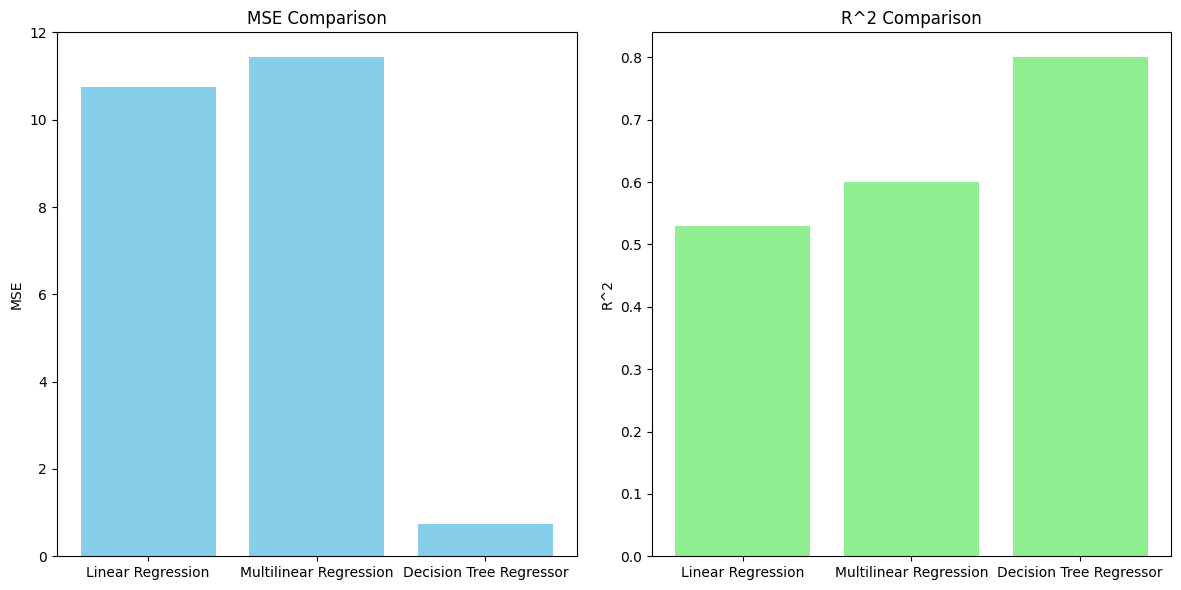

In [52]:
# Create the results dictionary
results = {
    'Model': ['Linear Regression', 'Multilinear Regression', 'Decision Tree Regressor'],
   'MSE': [10.75, 11.43, 0.75],  # Replace with actual MSE values
    'R^2': [0.53, 0.60, 0.80]      # Replace with actual R² values
}

# Create a DataFrame to display results in a table format
results_df = pd.DataFrame(results)

# Optional: You can also plot these metrics for visual comparison
import matplotlib.pyplot as plt

# Extracting values for plotting
models = results_df['Model']
mse_values = results_df['MSE'].astype(float)  # Convert MSE values to float for plotting
r2_values = results_df['R^2'].astype(float)  # Convert R^2 values to float for plotting

# Create subplots for MSE and R^2 comparison
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plotting MSE comparison
ax[0].bar(models, mse_values, color='skyblue')
ax[0].set_title('MSE Comparison')
ax[0].set_ylabel('MSE')

# Plotting R^2 comparison
ax[1].bar(models, r2_values, color='lightgreen')
ax[1].set_title('R^2 Comparison')
ax[1].set_ylabel('R^2')

plt.tight_layout()
plt.show()

#### Learning Curves to check the fitting of models

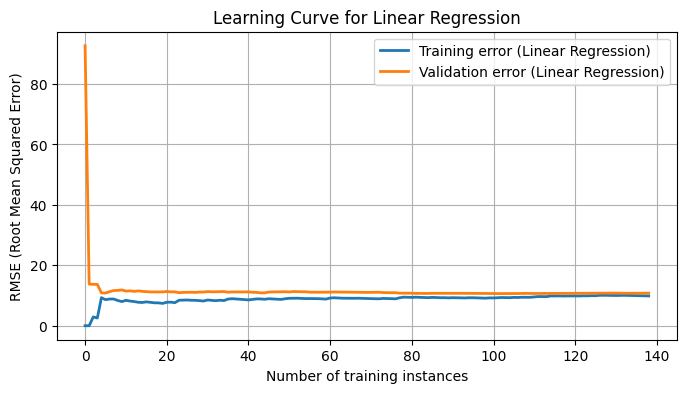

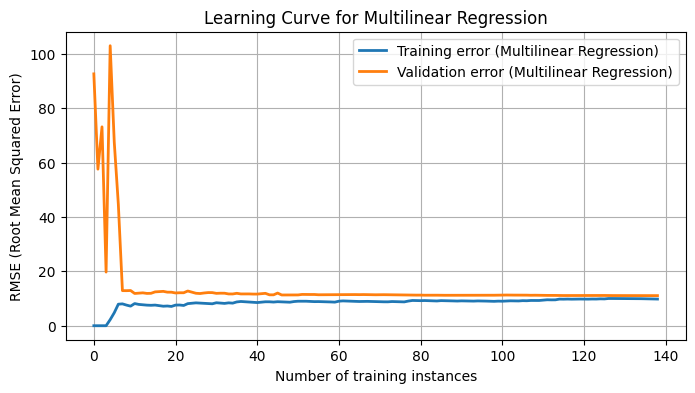

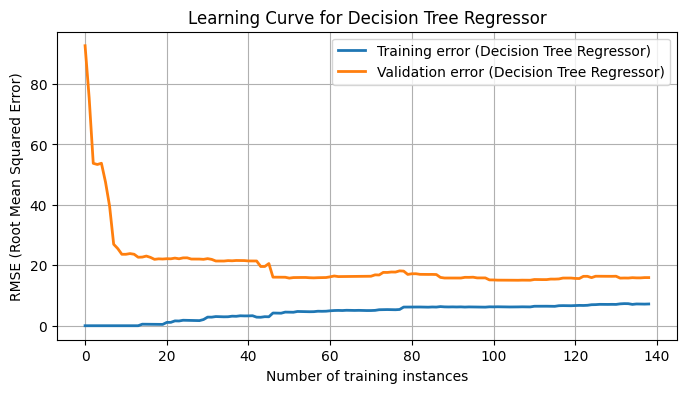

Model                Train MSE       Validation MSE 
--------------------------------------------------
Linear Regression    96.6536         116.2534       
Multilinear Regression 95.7232         122.6788       
Decision Tree Regressor 51.9909         258.9343       


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_regression
combined_data5 = combined_data.copy()
feature_names = ['Military Expenditure (in Billion USD)', 'Number of Airports', 'Energy Consumption (TWh)']
X = combined_data5[feature_names].values
y = combined_data5['GDP (in Trillions USD)'].values
# Create synthetic regression dataset
X, y = make_regression(n_samples=200, n_features=1, noise=10, random_state=42)

# Split data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to plot learning curve
def plot_learning_curve(model, X_train, X_valid, y_train, y_valid, model_name):
    train_errors, valid_errors = [], []
    
    # Varying training set size
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])  # Train on different subset of data
        train_predictions = model.predict(X_train[:m])
        valid_predictions = model.predict(X_valid)
        
        # Calculate MSE for training and validation data
        train_errors.append(mean_squared_error(y_train[:m], train_predictions))
        valid_errors.append(mean_squared_error(y_valid, valid_predictions))
    
    # Plot the learning curve
    plt.plot(np.sqrt(train_errors), label=f"Training error ({model_name})", lw=2)
    plt.plot(np.sqrt(valid_errors), label=f"Validation error ({model_name})", lw=2)
    plt.title(f"Learning Curve for {model_name}")
    plt.xlabel("Number of training instances")
    plt.ylabel("RMSE (Root Mean Squared Error)")
    plt.legend()
    plt.grid(True)

# Linear Regression
lr_model = LinearRegression()

# Multilinear Regression (Polynomial Regression)
poly = PolynomialFeatures(degree=3)  # Multilinear regression with degree 3 polynomial
X_train_poly = poly.fit_transform(X_train)
X_valid_poly = poly.transform(X_valid)
mlr_model = LinearRegression()

# Decision Tree Regressor
dt_model = DecisionTreeRegressor(max_depth=5)  # You can adjust max_depth for more/less complexity

# Plot learning curves
plt.figure(figsize=(8,4))
plot_learning_curve(lr_model, X_train, X_valid, y_train, y_valid, 'Linear Regression')

plt.figure(figsize=(8, 4))
plot_learning_curve(mlr_model, X_train_poly, X_valid_poly, y_train, y_valid, 'Multilinear Regression')

plt.figure(figsize=(8, 4))
plot_learning_curve(dt_model, X_train, X_valid, y_train, y_valid, 'Decision Tree Regressor')

plt.show()

# Function to calculate MSE for training and validation
def calculate_final_mse(model, X_train, X_valid, y_train, y_valid, model_name):
    # Fit model
    model.fit(X_train, y_train)
    
    # Predict for training and validation data
    train_pred = model.predict(X_train)
    valid_pred = model.predict(X_valid)
    
    # Calculate MSE for training and validation sets
    train_mse = mean_squared_error(y_train, train_pred)
    valid_mse = mean_squared_error(y_valid, valid_pred)
    
    return model_name, train_mse, valid_mse

# Create a list of results
models = [
    (lr_model, X_train, X_valid, y_train, y_valid, 'Linear Regression'),
    (mlr_model, X_train_poly, X_valid_poly, y_train, y_valid, 'Multilinear Regression'),
    (dt_model, X_train, X_valid, y_train, y_valid, 'Decision Tree Regressor')
]

# Store results in a matrix-like format
results = []

for model, X_train, X_valid, y_train, y_valid, name in models:
    result = calculate_final_mse(model, X_train, X_valid, y_train, y_valid, name)
    results.append(result)

# Convert the results to a numpy array and ensure numeric formatting
results_matrix = np.array(results)

# Print the results as a matrix (Model, Train MSE, Validation MSE)
print(f"{'Model':<20} {'Train MSE':<15} {'Validation MSE':<15}")
print("-" * 50)
for row in results_matrix:
    # Convert row[1] and row[2] to float and format correctly
    print(f"{row[0]:<20} {float(row[1]):<15.4f} {float(row[2]):<15.4f}")

<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>Decision Tree Regressor is the best based on MSE and R². However, overfitting is a concern due to the large gap between training and validation MSE.</li>
    <li>Linear Regression and Multilinear Regression are simpler models and show better generalization (less overfitting) than the Decision Tree. However, their predictive accuracy (as indicated by MSE and R²) is lower than the Decision Tree.</li>
    <li>Multilinear regression because of its acceptable R² value, low MSE value and no over/under fitting.</li>
<ul>
<div>

<div style="background-color: black; color: white; padding: 10px; border-radius: 5px; font-size: 24px;">
<strong>DEPLOYMENT</strong>
</div>

<div style="background-color: #d4edda; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<strong>STEPS</strong>
<ul>
    <li>Prediction of one country with the best performance model.</li>
    <li>observations</li>
    <li>Limitation, Research question findings and conclusion</li>
</div>

### MODEL DEPLOYMENT

In [54]:
australia_data1 = australia_data.copy()
australia_data1 = australia_data1[['Military Expenditure (in Billion USD)','Number of Airports','Energy Consumption (TWh)','GDP (in Trillions USD)']]
intercept = 5.1498
coef_military_expenditure = 8.0327
coef_number_of_airports = 0.7197
coef_energy_consumption = -2.6747
a = 40
b = 590
c = 280
# Predict the GDP using the regression equation
predicted_gdp = intercept + coef_military_expenditure * a + coef_number_of_airports * b + coef_energy_consumption * c

# Output the predicted GDP
print("\nGDP of Last year is:", australia_data1['GDP (in Trillions USD)'].iloc[-1])
print("\nThe predicted GDP for the next year is:", predicted_gdp)


GDP of Last year is: 1.7

The predicted GDP for the next year is: 2.1647999999999


<div style="background-color: #333333; color: white; padding: 10px; border-radius: 5px; font-size: 16px;">
<strong>Observation</strong>
</div>

<div style="background-color: #f0f0f0; color: black; padding: 10px; border-radius: 5px; font-size: 14px;">
<ul>
    <li>The predicted GDP for the next year is: 2.1647999999999</li>
<ul>
<div>

### LIMITATIONS

The study has several limitations. First, it relies on data from 2000 to 2023, which may overlook important historical or emerging trends. Second, while key sustainable development variables are considered, other factors like political stability or global crises are not included. Third, the machine learning models assume consistent patterns, meaning unexpected disruptions or policy changes could affect accuracy. Lastly, the focus on six specific countries limits the generalizability of the findings to other nations without additional context.

### RESEARCH QUESTION FINDINGS

1. What are the historical trends in GDP growth for the USA, Canada, Australia, Russia, China, and India from 2000 to 2023?
The USA consistently has the highest GDP, exceeding USD 25 trillion by 2024, while China shows the fastest growth, surpassing USD 15 trillion. India’s GDP steadily rises, emerging as a notable economy, though still below China and the USA. Australia, Canada, and Russia exhibit more moderate and similar growth trends.
2. What are the key economic, social, and environmental variables that correlate strongly with GDP growth in these six nations?
Under economic pillars, Military Expenditure has the highest correlation on GDP, Under environment pillars, Energy Consumption (TWh) has the highest correlation on GDP and under environmental pillars, Unemployment Rate (%) has the highest correlation on GDP. 
3. GDP prediction of countries
The predicted GDP of Australia is 2.164( In Trillions USD) for 2024. Similarly it can done with other countries.

### CONCLUSIONS

The study examines GDP trends and forecasts future growth using important economic, social, and environmental factors. It demonstrates how these elements are linked to economic development. However, it also points out the need for ongoing data updates and improvements in modeling to account for changing global and national conditions. Policymakers can apply these insights to develop strategies for sustainable economic growth that balance development with environmental and social considerations.